# AutoMLPipe-BC Jupyter Notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Jupyter Notebook Hack: This code ensures that the results of multiple commands within a given cell are all displayed, rather than just the last. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Phase 1: Exploratory Analysis

### Phase 1: Import Python Packages

In [2]:
import sys
import os
import glob
import ExploratoryAnalysisJob
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs
import random
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import ExploratoryAnalysisMain
import ExploratoryAnalysisJob

### Phase 1: Set Run Parameters

#### Manditory Parameters to Update

In [3]:
test_run = True #Leave true to run the local test dataset, make False to specify a different data folder path below

#Target dataset folder path(must include one or more .txt or .csv datasets)
data_path = "C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData" 

#Output foder path: where to save pipeline outputs
output_path = 'C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing'

#Unique experiment name - folder created for this analysis within output folder path
experiment_name = 'hcc_test'

# Data Labels
class_label = 'Class' #i.e. class outcome column label
instance_label = 'InstanceID' #If data includes instance labels, given respective column name here, otherwise put 'None'

#Manually specify features to leave out of analysis, or which to treat as categorical (without using built in variable type detector)
ignore_features_path = [] #list of column names to exclude from the analysis (only insert column names if needed, otherwise leave empty)
categorical_feature_path = [] #Leave empty for 'auto-detect' otherwise list feature names to be treated as categorical. Only impacts algorithms that can take variable type into account.

#### Optional Parameters to Update

In [4]:
cv_partitions = 3
partition_method = 'S' # S or R or M for stratified, random, or matched, respectively
match_label = 'None' # only applies when M selected for partition-method; indicates column label with matched instance ids' 

categorical_cutoff = 10 # number of unique values after which a variable is considered to be quantitative vs categorical
sig_cutoff = 0.05 #significance cutoff used throughout pipeline
export_exploratory_analysis = 'True' # run and export basic exploratory analysis files, i.e. unique value counts, missingness counts, class balance barplot
export_feature_correlations = 'True' # run and export feature correlation analysis (yields correlation heatmap)
export_univariate_plots = 'True' # export univariate analysis plots (note: univariate analysis still output by default)
topFeatures = 20 #Number of top features to report in notebook for univariate analysis
random_state = 42 # sets a specific random seed for reproducible results

#### Set and Report Data Folder Path as Specified

In [5]:
if test_run:
    wd_path = os.getcwd() #Working directory path automatically detected
    wd_path = wd_path.replace('\\','/')
    data_path = wd_path+'/TestData'
print("Data Folder Path: "+data_path)
jupyterRun = 'True' #Leave True

Data Folder Path: C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData


### Phase 1: Conduct Exploratory Analysis

In [6]:
ExploratoryAnalysisMain.makeDirTree(data_path,output_path,experiment_name,jupyterRun)

In [7]:
def ExploratoryAnalysis(dataset_path,experiment_path,cv_partitions,partition_method,categorical_cutoff,export_exploratory_analysis,export_feature_correlations,export_univariate_plots,class_label,instance_label,match_label,random_state):
    job_start_time = time.time()
    random.seed(random_state)
    np.random.seed(random_state)
    
    dataset_name,dataset_ext = ExploratoryAnalysisJob.makeFolders(dataset_path,experiment_path)
    
    data = ExploratoryAnalysisJob.loadData(dataset_path,dataset_ext)
    
    ExploratoryAnalysisJob.makeDataFolders(data,experiment_path,dataset_name)

    data = ExploratoryAnalysisJob.removeRowsColumns(data,class_label,ignore_features_path)

    if not match_label == 'None':
        dfHeader = list(data.columns.values)
        if not match_label in dfHeader:
            match_label = 'None'
            print("Warning: Specified 'Match label' could not be found in dataset. Analysis moving forward assuming there is no 'match label' column.")

    categorical_variables = ExploratoryAnalysisJob.idFeatureTypes(data,categorical_feature_path,instance_label,match_label,class_label,categorical_cutoff)

    ExploratoryAnalysisJob.countsSummary(data,class_label,experiment_path,dataset_name,instance_label,match_label,categorical_variables,jupyterRun)
    
    if eval(export_exploratory_analysis):
        ExploratoryAnalysisJob.basicExploratory(data,experiment_path,dataset_name,jupyterRun)
        

    if eval(export_feature_correlations):
        ExploratoryAnalysisJob.featureCorrelationPlot(data,class_label,instance_label,match_label,experiment_path,dataset_name,jupyterRun)
    
    sorted_p_list = ExploratoryAnalysisJob.univariateAnalysis(data,experiment_path,dataset_name,class_label,instance_label,match_label,categorical_variables,jupyterRun,topFeatures)
    
    if export_univariate_plots:
        ExploratoryAnalysisJob.univariatePlots(data,sorted_p_list,class_label,categorical_variables,experiment_path,dataset_name,sig_cutoff)
        
    ExploratoryAnalysisJob.reportHeaders(data,experiment_path,dataset_name,class_label,instance_label,match_label,partition_method)
    
    train_dfs,test_dfs = ExploratoryAnalysisJob.cv_partitioner(data,cv_partitions,partition_method,class_label,'True',match_label,random_state)
        
    ExploratoryAnalysisJob.saveCVDatasets(experiment_path,dataset_name,train_dfs,test_dfs)    
    
    ExploratoryAnalysisJob.saveRuntime(experiment_path,dataset_name,job_start_time)

---------------------------------------------------------------------------------
C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData/hcc-data_example.csv
Data Counts: ----------------
Instance Count = 165
Feature Count = 49
    Categorical  = 28
    Quantitative = 21
Class Counts: ----------------
0    102
1     63
Name: Class, dtype: int64


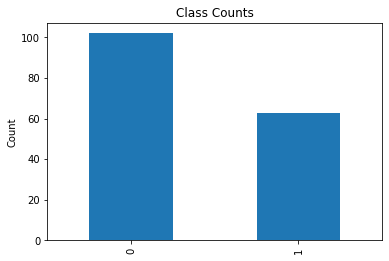

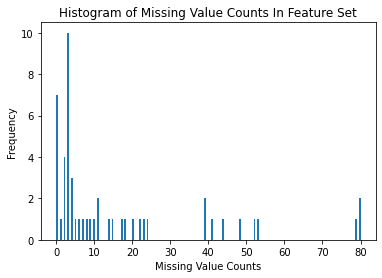

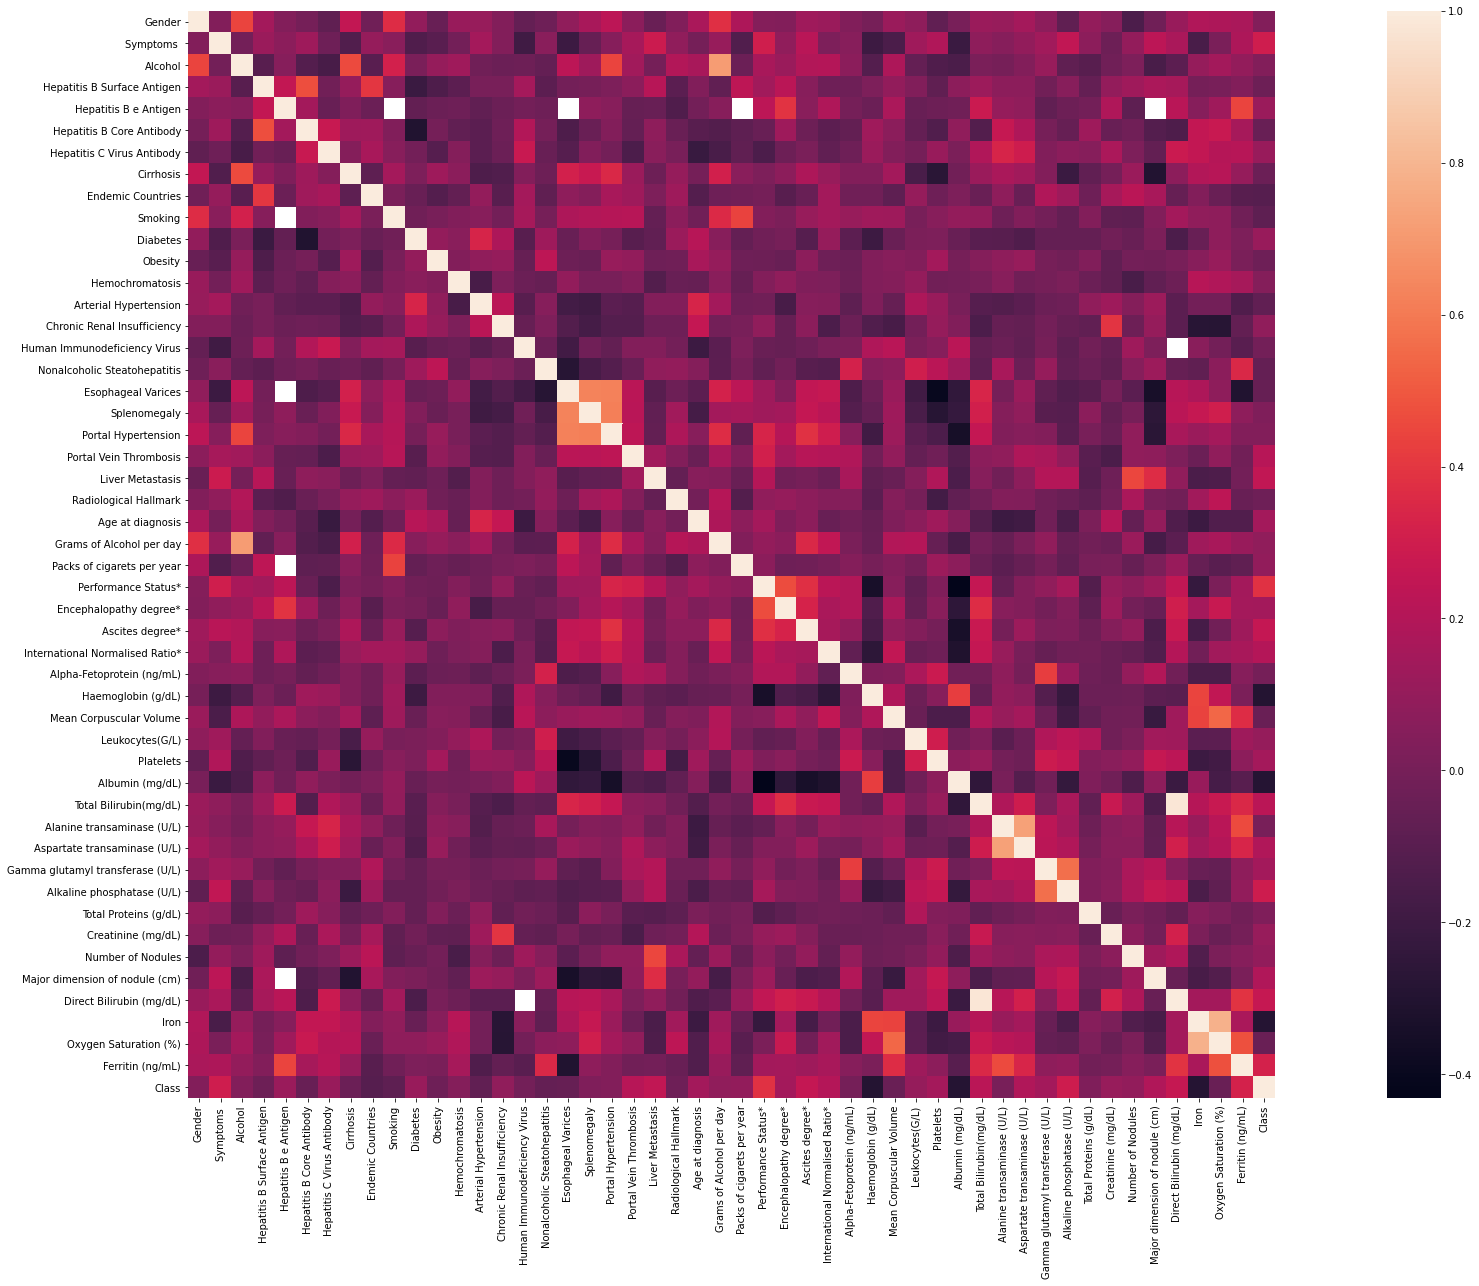

Plotting top significant 20 features.
###################################################
Significant Univariate Associations:
Alkaline phosphatase (U/L): (p-val = 3.5403912777218106e-06)
Iron: (p-val = 3.5423866432400713e-06)
Alpha-Fetoprotein (ng/mL): (p-val = 1.0082106490397668e-05)
Haemoglobin (g/dL): (p-val = 1.3037749087103508e-05)
Performance Status*: (p-val = 3.2548676278782114e-05)
Oxygen Saturation (%): (p-val = 3.998706534072513e-05)
Albumin (mg/dL): (p-val = 5.159435074542993e-05)
Symptoms : (p-val = 0.0006092985105592953)
Aspartate transaminase (U/L): (p-val = 0.002884797765802902)
Liver Metastasis: (p-val = 0.002993588224869906)
Ascites degree*: (p-val = 0.0038134308539161175)
Ferritin (ng/mL): (p-val = 0.004446494113520735)
Portal Vein Thrombosis: (p-val = 0.01174304115542567)
Major dimension of nodule (cm): (p-val = 0.01569067499758109)
Age at diagnosis: (p-val = 0.01784161875604351)
Gamma glutamyl transferase (U/L): (p-val = 0.02438867167652392)
Total Proteins (g/dL): 

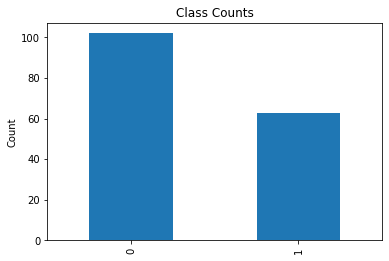

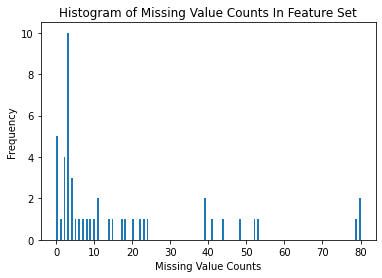

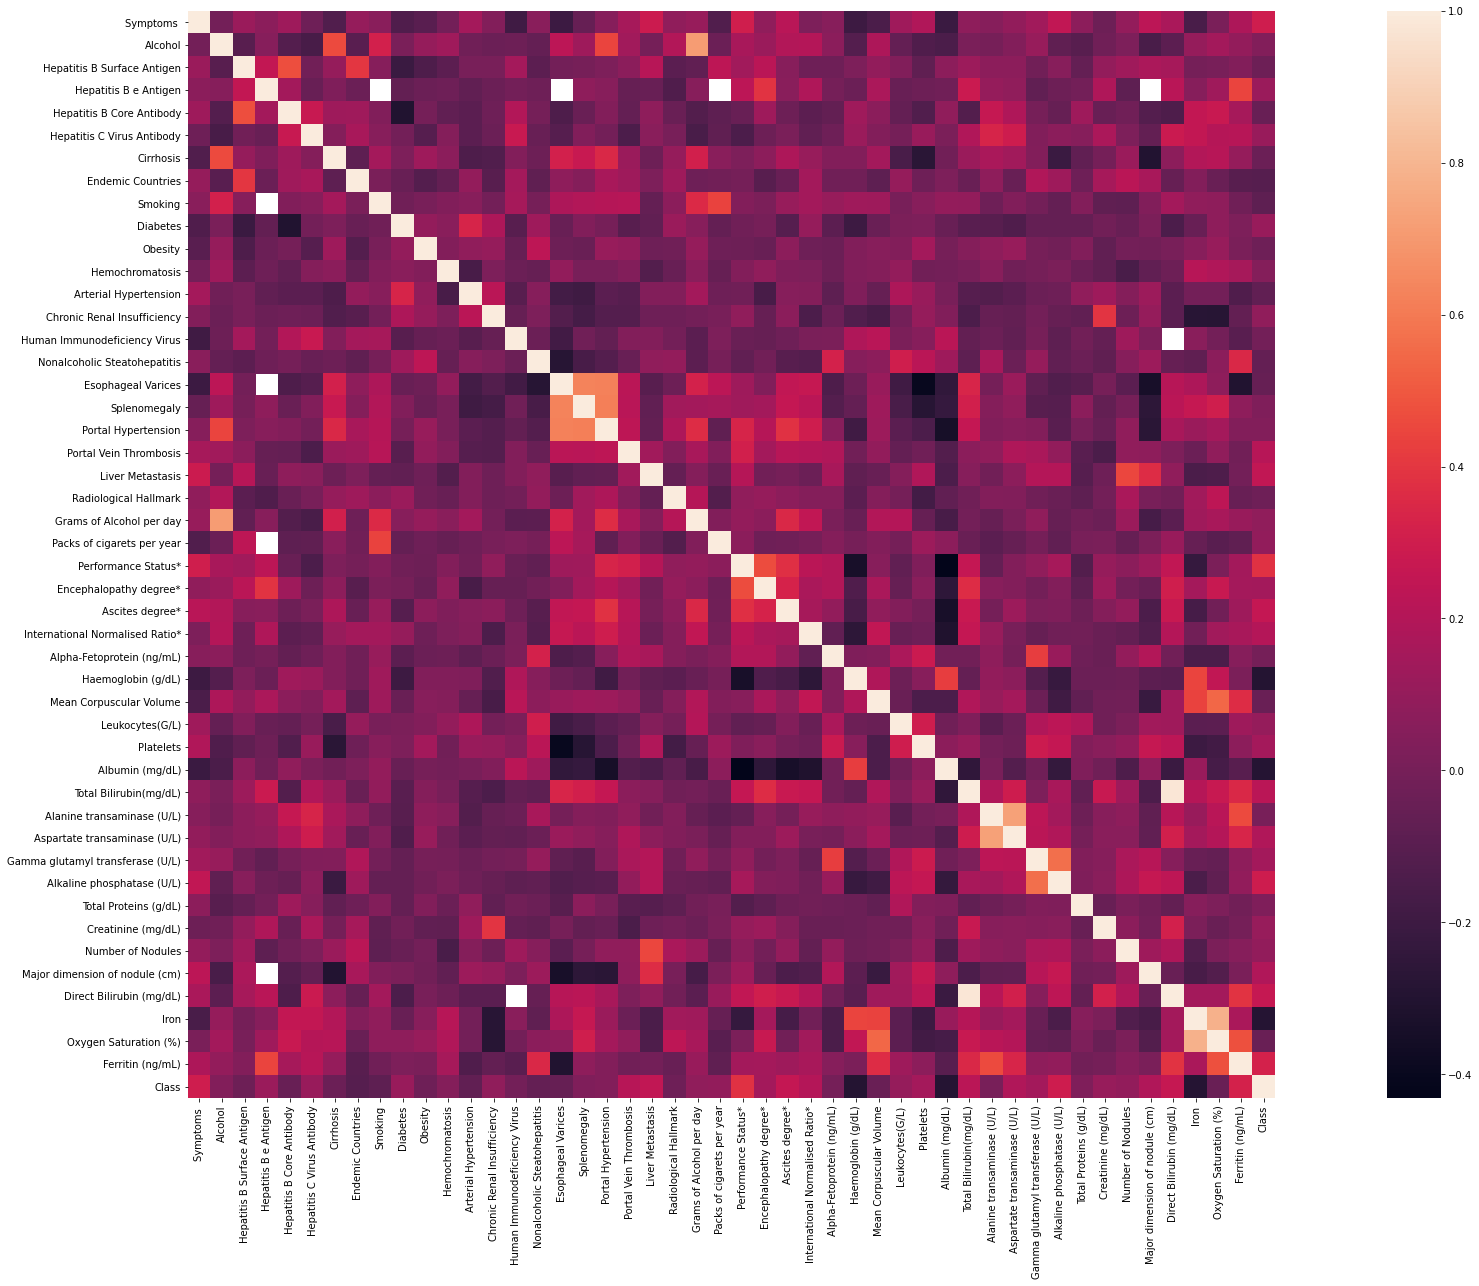

Plotting top significant 20 features.
###################################################
Significant Univariate Associations:
Alkaline phosphatase (U/L): (p-val = 3.5403912777218106e-06)
Iron: (p-val = 3.5423866432400713e-06)
Alpha-Fetoprotein (ng/mL): (p-val = 1.0082106490397668e-05)
Haemoglobin (g/dL): (p-val = 1.3037749087103508e-05)
Performance Status*: (p-val = 3.2548676278782114e-05)
Oxygen Saturation (%): (p-val = 3.998706534072513e-05)
Albumin (mg/dL): (p-val = 5.159435074542993e-05)
Symptoms : (p-val = 0.0006092985105592953)
Aspartate transaminase (U/L): (p-val = 0.002884797765802902)
Liver Metastasis: (p-val = 0.002993588224869906)
Ascites degree*: (p-val = 0.0038134308539161175)
Ferritin (ng/mL): (p-val = 0.004446494113520735)
Portal Vein Thrombosis: (p-val = 0.01174304115542567)
Major dimension of nodule (cm): (p-val = 0.01569067499758109)
Gamma glutamyl transferase (U/L): (p-val = 0.02438867167652392)
Total Proteins (g/dL): (p-val = 0.029520535772105137)
Encephalopathy de

18

19

27

17

23

38

17

21

36

In [8]:
#Determine file extension of datasets in target folder:
file_count = 0
unique_datanames = []
for datasetFilename in glob.glob(data_path+'/*'):
    datasetFilename = str(datasetFilename).replace('\\','/')
    print('---------------------------------------------------------------------------------')
    print(datasetFilename)
    file_extension = datasetFilename.split('/')[-1].split('.')[-1]
    data_name = datasetFilename.split('/')[-1].split('.')[0] #Save unique dataset names so that analysis is run only once if there is both a .txt and .csv version of dataset with same name.
    if file_extension == 'txt' or file_extension == 'csv':
        if data_name not in unique_datanames:
            unique_datanames.append(data_name)
            ExploratoryAnalysis(datasetFilename,output_path+'/'+experiment_name,cv_partitions,partition_method,categorical_cutoff,export_exploratory_analysis,export_feature_correlations,export_univariate_plots,class_label,instance_label,match_label,random_state)
            file_count += 1

if file_count == 0: #Check that there was at least 1 dataset
    raise Exception("There must be at least one .txt or .csv dataset in data_path directory")
    
with open(output_path+'/'+experiment_name+'/'+'metadata.csv',mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(["DATA LABEL", "VALUE"])
    writer.writerow(["class label",class_label])
    writer.writerow(["instance label", instance_label])
    writer.writerow(["random state",random_state])
    writer.writerow(["categorical cutoff",categorical_cutoff])
    writer.writerow(["statistical significance cutoff",sig_cutoff])
    writer.writerow(["cv partitions",cv_partitions])
    writer.writerow(["ignored features",ignore_features_path])
    writer.writerow(["specified categorical variables",categorical_feature_path])
file.close()

## Phase 2: Data Preprocessing

### Phase 2 Import Additional Python Packages

In [9]:
import pickle
import DataPreprocessingJob

### Phase 2 Set Run Parameters

In [10]:
scale_data = 'True' #perform data scaling?
impute_data = 'True' # perform missing value data imputation? (required for most ML algorithms if missing data is present)
overwrite_cv = 'False' # overwrites earlier cv datasets with new scaled/imputed ones

### Phase 2 Conduct Data Preprocessing

In [11]:
def DataPreprocessing(cv_train_path,cv_test_path,experiment_path,scale_data,impute_data,overwrite_cv,categorical_cutoff,class_label,instance_label,random_state):
    job_start_time = time.time()
    random.seed(random_state)
    np.random.seed(random_state)
    
    data_train,data_test,header,dataset_name,cvCount = DataPreprocessingJob.loadData(cv_train_path,cv_test_path,experiment_path,class_label,instance_label)
    
    categorical_variables = ExploratoryAnalysisJob.idFeatureTypes(data_train,categorical_feature_path,instance_label,'None',class_label,categorical_cutoff)
    
    #Scale Data
    if eval(scale_data):
        data_train,data_test, scaler = DataPreprocessingJob.dataScaling(data_train,data_test,class_label,instance_label,header,experiment_path,dataset_name,cvCount)

    #Impute Missing Values in Training and Testing Data
    if eval(impute_data):
        data_train,data_test,imputer,mode_dict = DataPreprocessingJob.imputeCVData(class_label,instance_label,categorical_variables,data_train,data_test,random_state,header,experiment_path,dataset_name,cvCount)

    DataPreprocessingJob.writeCVFiles(overwrite_cv,cv_train_path,cv_test_path,experiment_path,dataset_name,cvCount,data_train,data_test)
    
    DataPreprocessingJob.saveRuntime(experiment_path,dataset_name,job_start_time)
    

In [12]:
dataset_paths = os.listdir(output_path+"/"+experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path+"/"+experiment_name+"/"+dataset_directory_path
    for cv_train_path in glob.glob(full_path+"/CVDatasets/*Train.csv"):
        cv_train_path = str(cv_train_path).replace('\\','/')
        cv_test_path = cv_train_path.replace("Train.csv","Test.csv")
        DataPreprocessing(cv_train_path,cv_test_path,output_path+'/'+experiment_name,scale_data,impute_data,overwrite_cv,categorical_cutoff,class_label,instance_label,random_state)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 8: #Only update if metadata below hasn't been added before (i.e. in a previous phase 2 run)
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["Do Data Scaling",scale_data])
        writer.writerow(["Do Data Imputation",impute_data])
    file.close()

22

25

## Phase 3 Feature Importance Evaluation

### Phase 3 Import Additional Python Packages

In [13]:
from sklearn.feature_selection import mutual_info_classif
from skrebate import MultiSURF, TURF
import FeatureImportanceJob

### Phase 3 Set Run Parameters

In [14]:
do_mutual_info = 'True' #do mutual information analysis
do_multisurf = 'True' #do multiSURF analysis
use_TURF = 'False' # use TURF wrapper around MultiSURF
TURF_pct = 0.5 # proportion of instances removed in an iteration (also dictates number of iterations)
njobs = -1 #number of cores dedicated to running algorithm; setting to -1 will use all available cores
instance_subset = 2000 #sample subset size to use with multiSURF

### Phase 3 Conduct Feature Importance Evaluation

In [15]:
def FeatureImportance(cv_train_path,experiment_path,random_state,class_label,instance_label,instance_subset,algorithm,njobs,use_TURF,TURF_pct):
    job_start_time = time.time()
    random.seed(random_state)
    np.random.seed(random_state)
    
    dataset_name,dataFeatures,dataOutcome,header,cvCount = FeatureImportanceJob.prepareData(cv_train_path,instance_label,class_label)
    
    #Mutual Information
    if algorithm == 'mi':
        scores,outpath,outname = FeatureImportanceJob.runMutualInformation(experiment_path,dataset_name,cvCount,dataFeatures,dataOutcome,random_state)
    #MultiSURF
    elif algorithm == 'ms':
        scores,outpath,outname = FeatureImportanceJob.runMultiSURF(dataFeatures,dataOutcome,instance_subset,experiment_path,dataset_name,cvCount,use_TURF,TURF_pct,njobs)
    else:
        raise Exception("Feature importance algorithm not found")
    print(outpath)
    
    #Save sorted feature importance scores:
    scoreDict, score_sorted_features = FeatureImportanceJob.sort_save_fi_scores(scores, header, outpath, outname)
    
    FeatureImportanceJob.pickleScores(experiment_path,dataset_name,outname,scores,scoreDict,score_sorted_features,cvCount)
    
    FeatureImportanceJob.saveRuntime(experiment_path,dataset_name,job_start_time,outname,cvCount)

In [16]:
dataset_paths = os.listdir(output_path+"/"+experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path+"/"+experiment_name+"/"+dataset_directory_path
    experiment_path = output_path+'/'+experiment_name

    if eval(do_mutual_info):
        if not os.path.exists(full_path+"/mutualinformation"):
            os.mkdir(full_path+"/mutualinformation")
        for cv_train_path in glob.glob(full_path+"/CVDatasets/*_CV_*Train.csv"):
            cv_train_path = str(cv_train_path).replace('\\','/')
            FeatureImportance(cv_train_path,experiment_path,random_state,class_label,instance_label,instance_subset,'mi',njobs,use_TURF,TURF_pct)

    if eval(do_multisurf):
        if not os.path.exists(full_path+"/multisurf"):
            os.mkdir(full_path+"/multisurf")
        for cv_train_path in glob.glob(full_path+"/CVDatasets/*_CV_*Train.csv"):
            cv_train_path = str(cv_train_path).replace('\\','/')
            FeatureImportance(cv_train_path,experiment_path,random_state,class_label,instance_label,instance_subset,'ms',njobs,use_TURF,TURF_pct)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values        
if metadata.shape[0] == 10: #Only update if metadata below hasn't been added before (i.e. in a previous phase 2 run)
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["Do Mutual Info",do_mutual_info])
        writer.writerow(["Do MultiSURF", do_multisurf])
        writer.writerow(["Use TURF",use_TURF])
        writer.writerow(["TURF cutoff", TURF_pct])
        writer.writerow(["MultiSURF Instance Subset", instance_subset])
    file.close()

C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/mutualinformation/scores_cv_0.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/mutualinformation/scores_cv_1.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/mutualinformation/scores_cv_2.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/multisurf/scores_cv_0.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/multisurf/scores_cv_1.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example/multisurf/scores_cv_2.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example_no_covariates/mutualinformation/scores_cv_0.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example_no_covariates/mutualinformation/scores_cv_1.csv
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example_no_covariates

21

19

16

17

32

## Phase 4 Feature Selection

### Phase 4 Import Additional Python Packages

In [17]:
import copy
import FeatureSelectionJob

### Phase 4 Set Run Parameters

In [18]:
max_features_to_keep = 2000 # max features to keep. None if no max
filter_poor_features = 'True' # filter out the worst performing features prior to modeling
top_results = 20 #number of top features to illustrate in figures
export_scores = 'True' #export figure summarizing average feature importance scores over cv partitions

### Phase 4 Conduct Feature Selection

In [19]:
def FeatureSelection(full_path,do_mutual_info,do_multisurf,max_features_to_keep,filter_poor_features,top_results,export_scores,class_label,instance_label,cv_partitions,overwrite_cv):
    job_start_time = time.time()
    dataset_name = full_path.split('/')[-1]
    selected_feature_lists = {}
    meta_feature_ranks = {}
    algorithms = []
    
    #Mutual Information
    if eval(do_mutual_info):
        algorithms.append('Mutual Information')
        selected_feature_lists,meta_feature_ranks = FeatureSelectionJob.reportAveFS("Mutual Information","mutualinformation",cv_partitions,top_results,full_path,selected_feature_lists,meta_feature_ranks,export_scores,jupyterRun)

    #MultiSURF
    if eval(do_multisurf):
        algorithms.append('MultiSURF')
        selected_feature_lists,meta_feature_ranks = FeatureSelectionJob.reportAveFS("MultiSURF","multisurf",cv_partitions,top_results,full_path,selected_feature_lists,meta_feature_ranks,export_scores,jupyterRun)
        
    if len(algorithms) != 0:
        #Feature Selection
        if eval(filter_poor_features):
            #Identify top feature subset
            cv_selected_list = FeatureSelectionJob.selectFeatures(algorithms,cv_partitions,selected_feature_lists,max_features_to_keep,meta_feature_ranks)

            #Generate new datasets with selected feature subsets
            FeatureSelectionJob.genFilteredDatasets(cv_selected_list,class_label,instance_label,cv_partitions,full_path+'/CVDatasets',dataset_name,overwrite_cv)
            
    FeatureSelectionJob.saveRuntime(full_path,job_start_time)

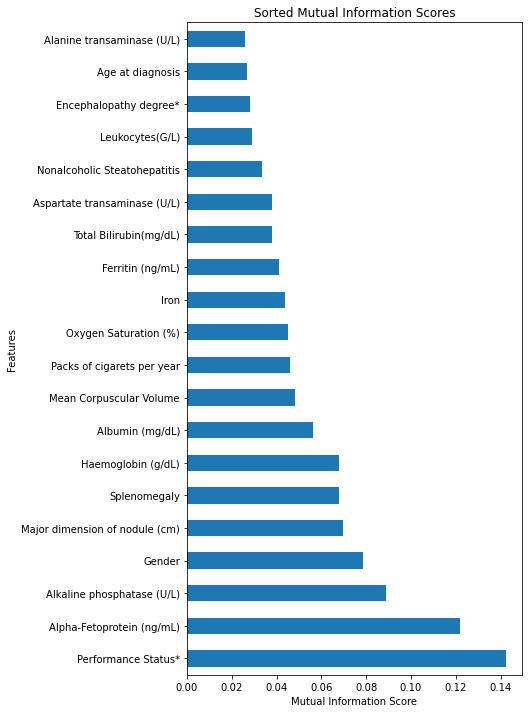

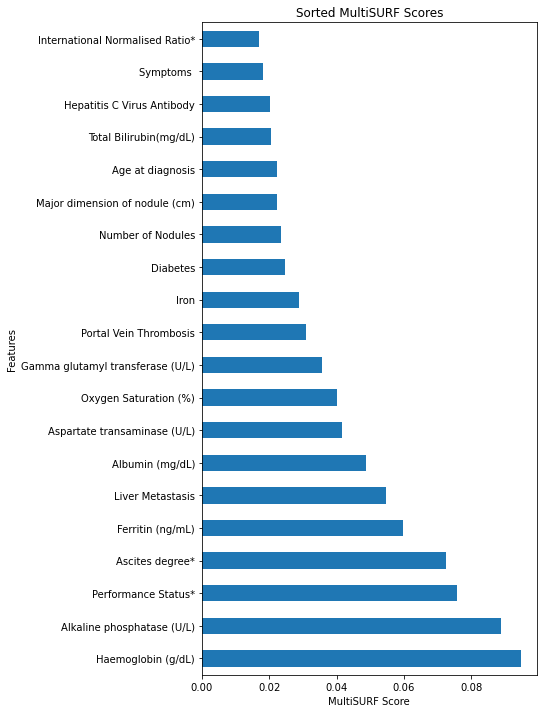

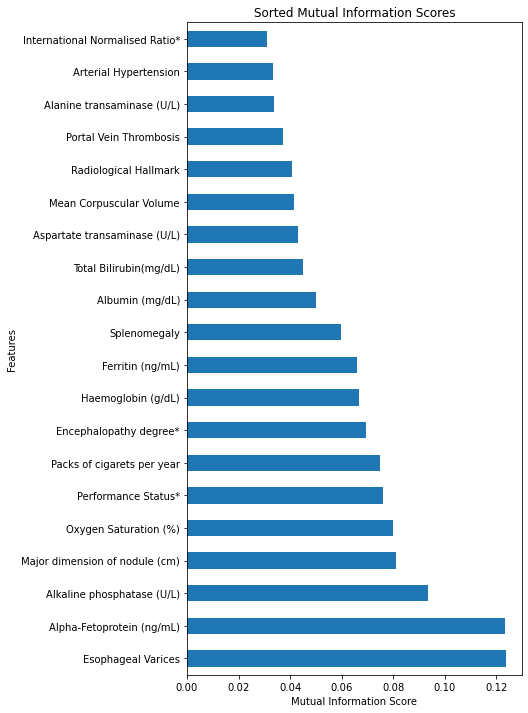

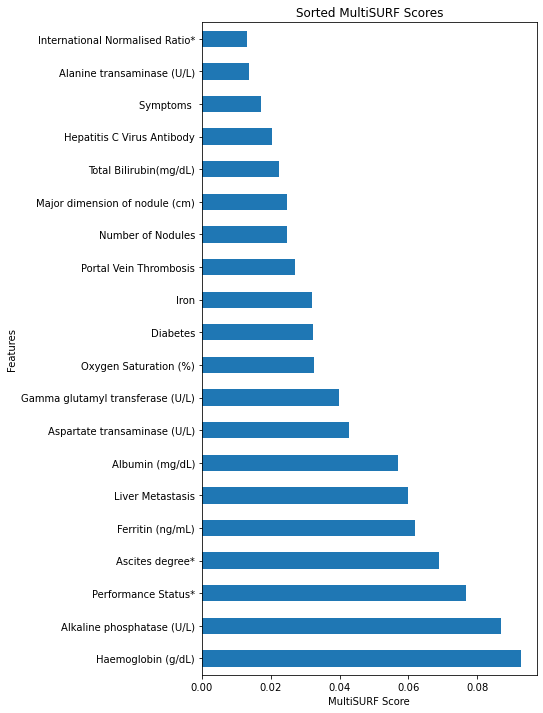

27

27

In [20]:
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    FeatureSelection(full_path,do_mutual_info,do_multisurf,max_features_to_keep,filter_poor_features,top_results,export_scores,class_label,instance_label,cv_partitions,overwrite_cv)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 15: #Only update if metadata below hasn't been added before
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["Max Features to keep",max_features_to_keep])
        writer.writerow(["Filter poor features", filter_poor_features])
    file.close()

## Phase 5 ML Modelings

### Phase 5 Import Additional Python Packages

In [21]:
import ModelJob
import math

#Scikit-Learn Packages:
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from skeLCS import eLCS
from skXCS import XCS
from skExSTraCS import ExSTraCS
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn import metrics

import xgboost as xgb
import lightgbm as lgb
import optuna #hyperparameter optimization

### Phase 5 Set Run Parameters

In [22]:
#ML Model Algorithm Options (individual hyperparameter options can be adjusted below)
"""
do_LR = 'True'       #run logistic regression modeling
do_DT = 'True'       #run decision tree modeling
do_RF = 'True'       #run random forest modeling
do_NB = 'True'       #run naive bayes modeling
do_XGB = 'True'      #run XGBoost modeling
do_LGB = 'True'      #run LGBoost modeling
do_SVM = 'True'      #run support vector machine modeling
do_ANN = 'True'      #run artificial neural network modeling
do_ExSTraCS = 'True' #run ExSTraCS modeling (a learning classifier system designed for biomedical data mining)
do_eLCS = 'True'     #run eLCS modeling (a basic supervised-learning learning classifier system)
do_XCS = 'True'      #run XCS modeling (a supervised-learning-only implementation of the best studied learning classifier system)
do_GB = 'True'       #run k-neighbors classifier modeling
do_KN = 'True'       #run gradient boosting modeling
"""
do_LR = 'True'       #run logistic regression modeling
do_DT = 'True'     #run decision tree modeling
do_RF = 'False'       #run random forest modeling
do_NB = 'True'       #run naive bayes modeling
do_XGB = 'False'      #run XGBoost modeling
do_LGB = 'False'     #run LGBoost modeling
do_SVM = 'False'     #run support vector machine modeling
do_ANN = 'False'      #run artificial neural network modeling
do_ExSTraCS = 'False' #run ExSTraCS modeling (a learning classifier system designed for biomedical data mining)
do_eLCS = 'False'     #run eLCS modeling (a basic supervised-learning learning classifier system)
do_XCS = 'False'      #run XCS modeling (a supervised-learning-only implementation of the best studied learning classifier system)
do_GB = 'False'       #run k-neighbors classifier modeling
do_KN = 'False'       #run gradient boosting modeling
#Other Analysis Parameters
training_subsample = 0  #for long running algos, option to subsample training set (0 for no subsample) Limit Sample Size Used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR to a lesser degree) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = 'True' #overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy'

#Hyperparameter Sweep Options
n_trials = 100   #number of bayesian hyperparameter optimization trials using optuna
timeout = 300    #seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started)
export_hyper_sweep_plots = 'True' #Export hyper parameter sweep plots from optuna

#Learning classifier system specific options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = 'False' #do LCS hyperparam tuning or use below params
nu = 1               #fixed LCS nu param
iterations = 200000  #fixed LCS # learning iterations param
N = 2000             #fixed LCS rule population maximum size param
lcs_timeout = 1200 #seconds until hyperparameter sweep stops for LCS algorithms (evolutionary algorithms often require more time for a single run)

"\ndo_LR = 'True'       #run logistic regression modeling\ndo_DT = 'True'       #run decision tree modeling\ndo_RF = 'True'       #run random forest modeling\ndo_NB = 'True'       #run naive bayes modeling\ndo_XGB = 'True'      #run XGBoost modeling\ndo_LGB = 'True'      #run LGBoost modeling\ndo_SVM = 'True'      #run support vector machine modeling\ndo_ANN = 'True'      #run artificial neural network modeling\ndo_ExSTraCS = 'True' #run ExSTraCS modeling (a learning classifier system designed for biomedical data mining)\ndo_eLCS = 'True'     #run eLCS modeling (a basic supervised-learning learning classifier system)\ndo_XCS = 'True'      #run XCS modeling (a supervised-learning-only implementation of the best studied learning classifier system)\ndo_GB = 'True'       #run k-neighbors classifier modeling\ndo_KN = 'True'       #run gradient boosting modeling\n"

In [23]:
#algorithms = ['logistic_regression','decision_tree','random_forest','naive_bayes','XGB','LGB','SVM','ANN','ExSTraCS','eLCS','XCS','gradient_boosting','k_neighbors']
algorithms = []
if eval(do_LR):
    algorithms.append("logistic_regression")
if eval(do_DT):
    algorithms.append("decision_tree")
if eval(do_RF):
    algorithms.append('random_forest')
if eval(do_NB):
    algorithms.append('naive_bayes')
if eval(do_XGB):
    algorithms.append('XGB')
if eval(do_LGB):
    algorithms.append('LGB')
if eval(do_SVM):
    algorithms.append('SVM')
if eval(do_ANN):
    algorithms.append('ANN')
if eval(do_ExSTraCS):
    algorithms.append('ExSTraCS')
if eval(do_eLCS):
    algorithms.append('eLCS')
if eval(do_XCS):
    algorithms.append('XCS')
if eval(do_GB):
    algorithms.append('gradient_boosting')
if eval(do_KN):
    algorithms.append('k_neighbors')

### Phase 5 Conduct ML Modeling

In [24]:
def hyperparameters(random_state,do_lcs_sweep,nu,iterations,N):
    param_grid = {}
    #######EDITABLE CODE################################################################################################
    # Logistic Regression - can take a longer while in larger instance spaces
    param_grid_LR = {'penalty': ['l2', 'l1'],'C': [1e-5, 1e5],'dual': [True, False],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'class_weight': [None, 'balanced'],'max_iter': [10, 1000],
                     'random_state':[random_state]}

    # Decision Tree
    param_grid_DT = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 30],
                     'min_samples_split': [2, 50],'min_samples_leaf': [1, 50],'max_features': [None, 'auto', 'log2'],
                     'class_weight': [None, 'balanced'],
                     'random_state':[random_state]}

    # Random Forest
    param_grid_RF = {'n_estimators': [10, 1000],'criterion': ['gini', 'entropy'],'max_depth': [1, 30],
                     'min_samples_split': [2, 50],'min_samples_leaf': [1, 50],'max_features': [None, 'auto', 'log2'],
                     'bootstrap': [True],'oob_score': [False, True],'class_weight': [None, 'balanced'],
                     'random_state':[random_state]}

    # XG Boost - not great for large instance spaces (limited completion). note: class weight balance is included as option internally
    param_grid_XGB = {'booster': ['gbtree'],'objective': ['binary:logistic'],'verbosity': [0],'reg_lambda': [1e-8, 1.0],
                      'alpha': [1e-8, 1.0],'eta': [1e-8, 1.0],'gamma': [1e-8, 1.0],'max_depth': [1, 30],
                      'grow_policy': ['depthwise', 'lossguide'],'n_estimators': [10, 1000],'min_samples_split': [2, 50],
                      'min_samples_leaf': [1, 50],'subsample': [0.5, 1.0],'min_child_weight': [0.1, 10],
                      'colsample_bytree': [0.1, 1.0],'nthread':[1],'random_state':[random_state]}

    # LG Boost - note: class weight balance is included as option internally (still takes a while on large instance spaces)
    param_grid_LGB = {'objective': ['binary'],'metric': ['binary_logloss'],'verbosity': [-1],'boosting_type': ['gbdt'],
                      'num_leaves': [2, 256],'max_depth': [1, 30],'lambda_l1': [1e-8, 10.0],'lambda_l2': [1e-8, 10.0],
                      'feature_fraction': [0.4, 1.0],'bagging_fraction': [0.4, 1.0],'bagging_freq': [1, 7],
                      'min_child_samples': [5, 100],'n_estimators': [10, 1000],'num_threads':[1],'random_state':[random_state]}

    # SVM - not approppriate for large instance spaces
    param_grid_SVM = {'kernel': ['linear', 'poly', 'rbf'],'C': [0.1, 1000],'gamma': ['scale'],'degree': [1, 6],
                      'probability': [True],'class_weight': [None, 'balanced'],'random_state':[random_state]}

    # ANN - bad for large instances spaces
    param_grid_ANN = {'n_layers': [1, 3],'layer_size': [1, 100],'activation': ['identity', 'logistic', 'tanh', 'relu'],
                      'learning_rate': ['constant', 'invscaling', 'adaptive'],'momentum': [.1, .9],
                      'solver': ['sgd', 'adam'],'batch_size': ['auto'],'alpha': [0.0001, 0.05],'max_iter': [200],
                      'random_state':[random_state]}

    if eval(do_lcs_sweep):
        # ExSTraCS
        param_grid_ExSTraCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                               'random_state':[random_state],'rule_compaction':[None]}

        # eLCS
        param_grid_eLCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                           'random_state':[random_state]}

        # XCS
        param_grid_XCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                          'random_state':[random_state]}
    else:
        # ExSTraCS
        param_grid_ExSTraCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state], 
                               'rule_compaction': [None]}

        # eLCS
        param_grid_eLCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state]}

        # XCS
        param_grid_XCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state]}

    # GB
    param_grid_GB = {'n_estimators': [10, 1000],'loss': ['deviance', 'exponential'], 'learning_rate': [.0001, 0.3], 
                     'min_samples_leaf': [1, 50],'min_samples_split': [2, 50], 'max_depth': [1, 30],
                     'random_state':[random_state]}

    # KN - not appropriate for large instance spaces
    param_grid_KN = {'n_neighbors': [1, 100], 'weights': ['uniform', 'distance'], 'p': [1, 5],
                     'metric': ['euclidean', 'minkowski']}

    ####################################################################################################################
    param_grid['logistic_regression'] = param_grid_LR
    param_grid['decision_tree'] = param_grid_DT
    param_grid['random_forest'] = param_grid_RF
    param_grid['XGB'] = param_grid_XGB
    param_grid['LGB'] = param_grid_LGB
    param_grid['SVM'] = param_grid_SVM
    param_grid['ANN'] = param_grid_ANN
    param_grid['ExSTraCS'] = param_grid_ExSTraCS
    param_grid['eLCS'] = param_grid_eLCS
    param_grid['XCS'] = param_grid_XCS
    param_grid['naive_bayes'] = {}
    param_grid['gradient_boosting'] = param_grid_GB
    param_grid['k_neighbors'] = param_grid_KN
    return param_grid

In [25]:
def Modeling(algorithm,train_file_path,test_file_path,full_path,n_trials,timeout,lcs_timeout,export_hyper_sweep_plots,instance_label,class_label,random_state,cvCount,filter_poor_features,do_lcs_sweep,nu,iterations,N,training_subsample,use_uniform_FI,primary_metric):
    job_start_time = time.time()
    random.seed(random_state)
    np.random.seed(random_state)
    
    #Get hyperparameter grid
    param_grid = hyperparameters(random_state,do_lcs_sweep,nu,iterations,N)[algorithm]
    trainX,trainY,testX,testY = ModelJob.dataPrep(train_file_path,instance_label,class_label,test_file_path)
    
    #Run model
    abbrev = {'logistic_regression':'LR','decision_tree':'DT','random_forest':'RF','naive_bayes':'NB','XGB':'XGB','LGB':'LGB','ANN':'ANN','SVM':'SVM','ExSTraCS':'ExSTraCS','eLCS':'eLCS','XCS':'XCS','gradient_boosting':'GB','k_neighbors':'KN'}
    if algorithm == 'logistic_regression':
        ret = ModelJob.run_LR_full(trainX,trainY,testX,testY, random_state, cvCount,param_grid,n_trials,timeout,export_hyper_sweep_plots,full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'decision_tree':
        ret = ModelJob.run_DT_full(trainX, trainY, testX,testY, random_state,cvCount, param_grid,n_trials, timeout,export_hyper_sweep_plots,full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'random_forest':
        ret = ModelJob.run_RF_full(trainX, trainY, testX,testY, random_state,cvCount, param_grid,n_trials, timeout,export_hyper_sweep_plots, full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'naive_bayes':
        ret = ModelJob.run_NB_full(trainX, trainY, testX,testY, random_state,cvCount, param_grid,n_trials, timeout,export_hyper_sweep_plots,full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'XGB':
        ret = ModelJob.run_XGB_full(trainX, trainY, testX,testY, random_state,cvCount, param_grid,n_trials, timeout,export_hyper_sweep_plots,full_path,training_subsample,use_uniform_FI,primary_metric)
    elif algorithm == 'LGB':
        ret = ModelJob.run_LGB_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, timeout,export_hyper_sweep_plots, full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'ANN':
        ret = ModelJob.run_ANN_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, timeout,export_hyper_sweep_plots, full_path,training_subsample,use_uniform_FI,primary_metric)
    elif algorithm == 'SVM':
        ret = ModelJob.run_SVM_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, timeout,export_hyper_sweep_plots, full_path,training_subsample,use_uniform_FI,primary_metric)
    elif algorithm == 'eLCS':
        ret = ModelJob.run_eLCS_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, lcs_timeout,export_hyper_sweep_plots, full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'XCS':
        ret = ModelJob.run_XCS_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, lcs_timeout,export_hyper_sweep_plots, full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'ExSTraCS':
        ret = ModelJob.run_ExSTraCS_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, lcs_timeout,export_hyper_sweep_plots, full_path,filter_poor_features,instance_label,class_label,use_uniform_FI,primary_metric)
    elif algorithm == 'gradient_boosting':
        ret = ModelJob.run_GB_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, timeout,export_hyper_sweep_plots, full_path,use_uniform_FI,primary_metric)
    elif algorithm == 'k_neighbors':
        ret = ModelJob.run_KN_full(trainX, trainY, testX, testY, random_state, cvCount, param_grid, n_trials, timeout,export_hyper_sweep_plots, full_path,training_subsample,use_uniform_FI,primary_metric)
    pickle.dump(ret, open(full_path + '/training/' + abbrev[algorithm] + '_CV_' + str(cvCount) + "_metrics", 'wb'))
    
    ModelJob.saveRuntime(full_path,job_start_time,abbrev,algorithm,cvCount)

In [26]:
#algorithms = ['logistic_regression','decision_tree','random_forest','naive_bayes','XGB','LGB','SVM','ANN','ExSTraCS','eLCS','XCS','gradient_boosting','k_neighbors']
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    if not os.path.exists(full_path+'/training'):
        os.mkdir(full_path+'/training')
    if not os.path.exists(full_path+'/training/pickledModels'):
        os.mkdir(full_path+'/training/pickledModels')

    for cvCount in range(cv_partitions):
        train_file_path = full_path+'/CVDatasets/'+dataset_directory_path+"_CV_"+str(cvCount)+"_Train.csv"
        test_file_path = full_path + '/CVDatasets/' + dataset_directory_path + "_CV_" + str(cvCount) + "_Test.csv"
        for algorithm in algorithms:
            Modeling(algorithm,train_file_path,test_file_path,full_path,n_trials,timeout,lcs_timeout,export_hyper_sweep_plots,instance_label,class_label,random_state,cvCount,filter_poor_features,do_lcs_sweep,nu,iterations,N,training_subsample,use_uniform_FI,primary_metric)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 17: #Only update if metadata below hasn't been added before
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv', mode='a') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["LR", str(do_LR)])
        writer.writerow(["DT", str(do_DT)])
        writer.writerow(["RF", str(do_RF)])
        writer.writerow(["NB", str(do_NB)])
        writer.writerow(["XGB", str(do_XGB)])
        writer.writerow(["LGB", str(do_LGB)])
        writer.writerow(["SVM", str(do_SVM)])
        writer.writerow(["ANN", str(do_ANN)])
        writer.writerow(["ExSTraCS",str(do_ExSTraCS)])
        writer.writerow(["eLCS", str(do_eLCS)])
        writer.writerow(["XCS",str(do_XCS)])
        writer.writerow(["GB",str(do_GB)])
        writer.writerow(["KN", str(do_KN)])
        writer.writerow(["Primary Metric",primary_metric])
        writer.writerow(["Training Subsample for KN,ANN,SVM,and XGB",training_subsample])
        writer.writerow(["Use Uniform Model Feature Importance Estimation",use_uniform_FI])
        writer.writerow(["HypeSweep Number of Trials",n_trials])
        writer.writerow(["HypeSweep Timeout",timeout])
        writer.writerow(['do LCS sweep',do_lcs_sweep])
        writer.writerow(['nu', nu])
        writer.writerow(['iterations', iterations])
        writer.writerow(['N', N])
        writer.writerow(["LCS timeout",lcs_timeout])

    file.close()

Best trial:
  Value:  0.7088274044795785
  Params: 
    penalty: l2
    dual: False
    C: 564.0638061927879
    solver: lbfgs
    class_weight: balanced
    max_iter: 616.1049539380961
    random_state: 42
LogisticRegression(C=564.0638061927879, class_weight='balanced',
                   max_iter=616.1049539380961, random_state=42)
Best trial:
  Value:  0.6597496706192358
  Params: 
    criterion: gini
    splitter: random
    max_depth: 3
    min_samples_split: 41
    min_samples_leaf: 22
    max_features: None
    class_weight: balanced
    random_state: 42
DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=22, min_samples_split=41,
                       random_state=42, splitter='random')
Best trial:
  Value:  0.7477884434406173
  Params: 
    penalty: l2
    dual: False
    C: 297.3042389323509
    solver: saga
    class_weight: balanced
    max_iter: 51.70191786366991
    random_state: 42
LogisticRegression(C=297.3042389323509, 

9

9

10

9

11

11

11

11

16

12

11

10

10

34

47

54

32

23

20

6

19

8

18

## Phase 6 Statistics (Stats Summaries, Figures, Statistical Comparisons)

### Phase 6 Import Additional Python Packages

In [27]:
import StatsJob
from scipy import interp,stats
from matplotlib import rc
from statistics import mean,stdev

### Phase 6 Set Run Parameters

In [28]:
plot_ROC = 'True' #Plot ROC curves individually for each algorithm including all CV results and averages
plot_PRC = 'True' #Plot PRC curves individually for each algorithm including all CV results and averages
plot_FI_box = 'True' #Plot box plot summaries comparing algorithms for each metric
plot_metric_boxplots = 'True' #Plot feature importance boxplots for each algorithm

### Phase 6 Conduct Statistics

In [29]:
def encode(do_algo,encodedAlgos):
    if eval(do_algo):
        encodedAlgos += '1'
    else:
        encodedAlgos += '0'
    return encodedAlgos


In [30]:
def Stats(full_path,encodedAlgos,plot_ROC,plot_PRC,plot_FI_box,class_label,instance_label,cv_partitions,primary_metric):
    job_start_time = time.time()
    data_name = full_path.split('/')[-1]
    print(full_path)
    
    #Translate metric from scikitlearn standard
    metric_term_dict = {'balanced_accuracy': 'Balanced Accuracy','accuracy': 'Accuracy','f1': 'F1_Score','recall': 'Sensitivity (Recall)','precision': 'Precision (PPV)','roc_auc': 'ROC_AUC'}
    primary_metric = metric_term_dict[primary_metric]
    
    algorithms,abbrev,colors,original_headers = StatsJob.preparation(full_path,encodedAlgos)
    
    result_table,metric_dict = StatsJob.primaryStats(algorithms,original_headers,cv_partitions,full_path,data_name,instance_label,class_label,abbrev,colors,plot_ROC,plot_PRC,jupyterRun)

    StatsJob.doPlotROC(result_table,colors,full_path,jupyterRun)
    StatsJob.doPlotPRC(result_table,colors,full_path,data_name,instance_label,class_label,jupyterRun)

    metrics = list(metric_dict[algorithms[0]].keys())
    
    StatsJob.saveMetricMeans(full_path,metrics,metric_dict)
    StatsJob.saveMetricStd(full_path,metrics,metric_dict)

    if eval(plot_metric_boxplots):
        StatsJob.metricBoxplots(full_path,metrics,algorithms,metric_dict,jupyterRun)
        
    #Save Kruskal Wallis and Mann Whitney Stats
    if len(algorithms) > 1:
        kruskal_summary = StatsJob.kruskalWallis(full_path,metrics,algorithms,metric_dict,sig_cutoff)
        StatsJob.mannWhitneyU(full_path,metrics,algorithms,metric_dict,kruskal_summary,sig_cutoff)
        
    #Visualize FI

    fi_df_list,fi_ave_list,fi_ave_norm_list,ave_metric_list,all_feature_list,non_zero_union_features,non_zero_union_indexes = StatsJob.prepFI(algorithms,full_path,abbrev,metric_dict,primary_metric,top_results)

    featuresToViz = StatsJob.selectForViz(top_results,non_zero_union_features,non_zero_union_indexes,algorithms,ave_metric_list,fi_ave_norm_list)

    if eval(plot_FI_box):
        StatsJob.doFIBoxplots(full_path,fi_df_list,algorithms,original_headers,jupyterRun)

    #Normalize FI scores for normalized compound FI plot
    top_fi_ave_norm_list,all_feature_listToViz = StatsJob.normalizeFI(featuresToViz,all_feature_list,algorithms,fi_ave_norm_list)

    #Generate Normalized Compound FI plot
    StatsJob.compound_FI_plot(top_fi_ave_norm_list, algorithms, list(colors.values()), all_feature_listToViz, 'Norm',full_path,jupyterRun)

    #Fractionate FI scores for normalized and fractionated compound FI plot
    fracLists = StatsJob.fracFI(top_fi_ave_norm_list)

    #Generate Normalized and Fractioned Compound FI plot
    StatsJob.compound_FI_plot(fracLists, algorithms, list(colors.values()), all_feature_listToViz, 'Norm_Frac',full_path,jupyterRun)

    #Weight FI scores for normalized and (model performance) weighted compound FI plot
    weightedLists,weights = StatsJob.weightFI(ave_metric_list,top_fi_ave_norm_list)

    #Generate Normalized and Weighted Compount FI plot
    StatsJob.compound_FI_plot(weightedLists, algorithms, list(colors.values()), all_feature_listToViz, 'Norm_Weight',full_path,jupyterRun)

    #Weight the Fractionated FI scores for normalized,fractionated, and weighted compount FI plot
    weightedFracLists = StatsJob.weighFracFI(fracLists,weights)

    #Generate Normalized, Fractionated, and Weighted Compount FI plot
    StatsJob.compound_FI_plot(weightedFracLists, algorithms, list(colors.values()), all_feature_listToViz, 'Norm_Frac_Weight',full_path,jupyterRun)

    StatsJob.saveRuntime(full_path,job_start_time)
    StatsJob.parseRuntime(full_path,abbrev)

C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example


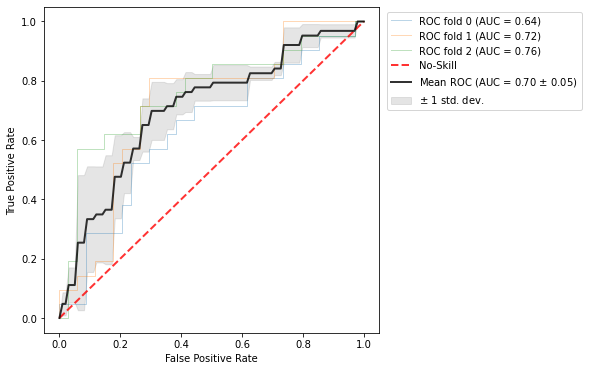

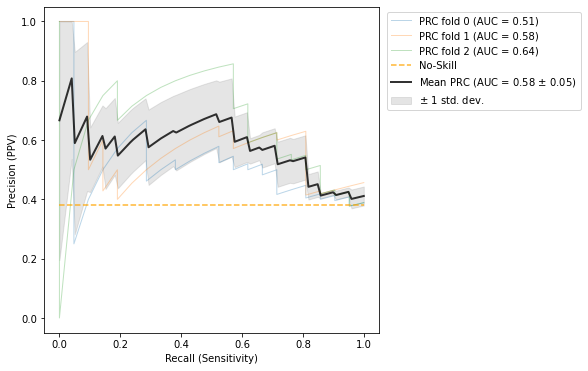

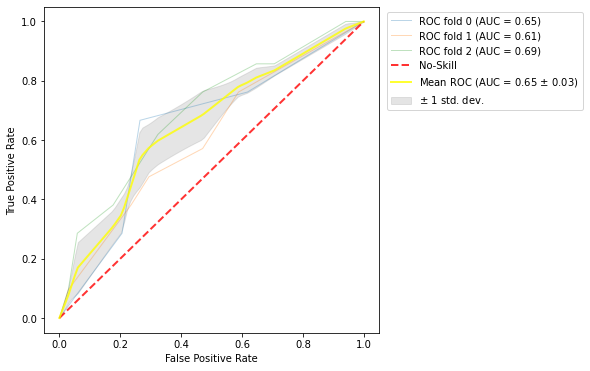

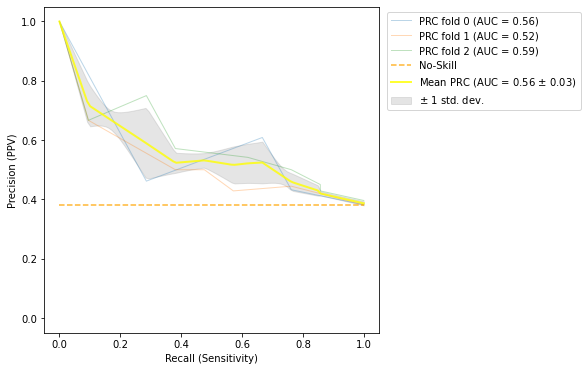

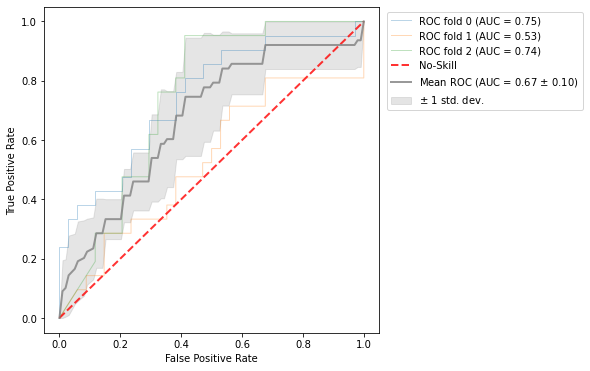

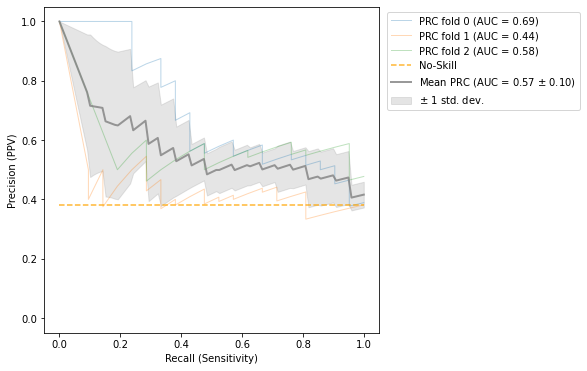

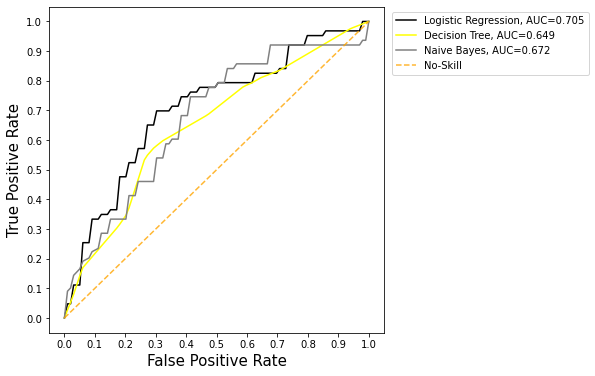

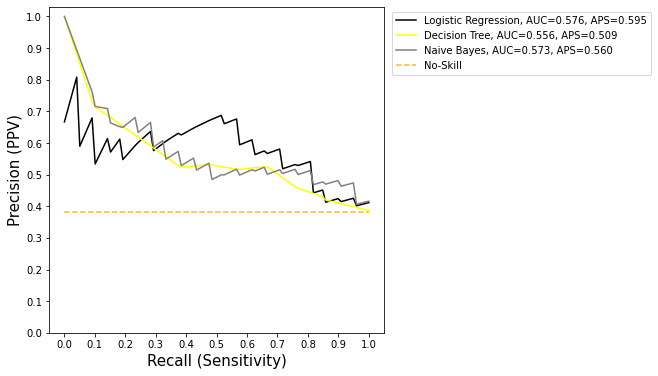

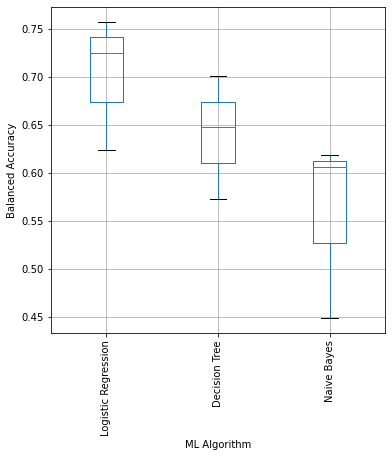

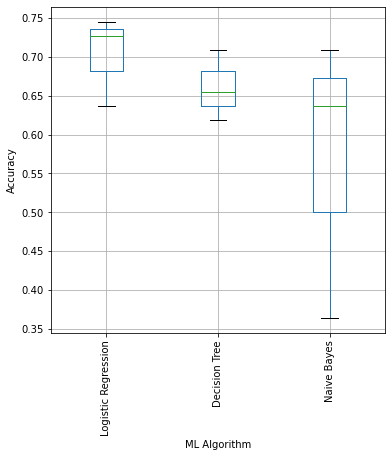

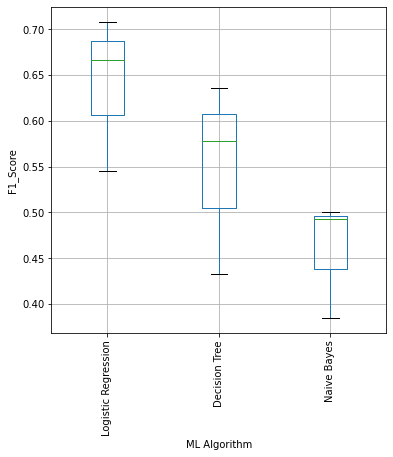

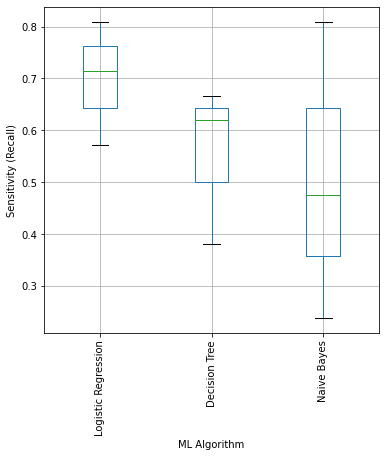

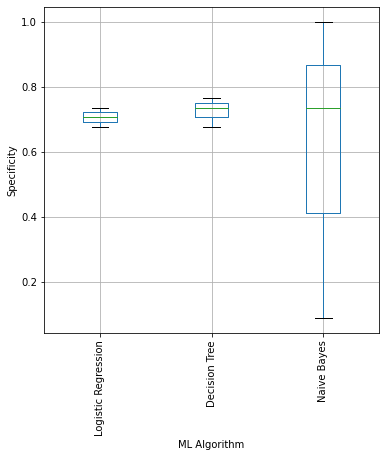

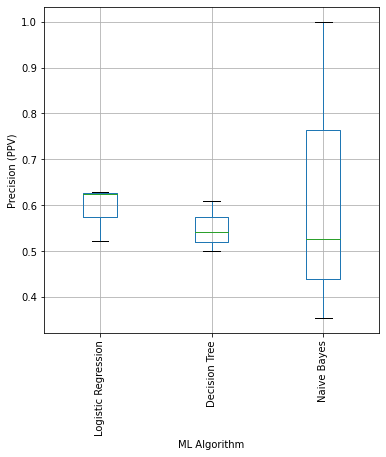

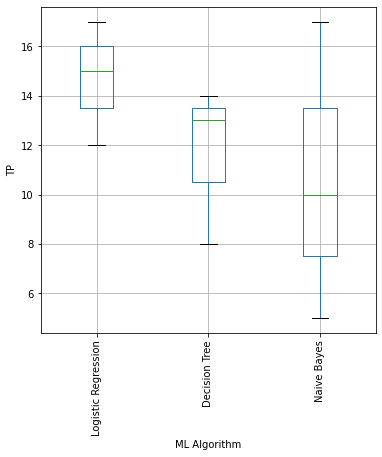

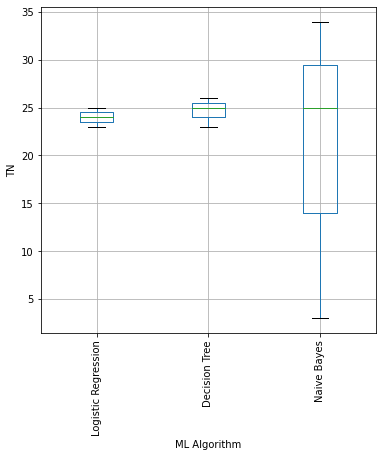

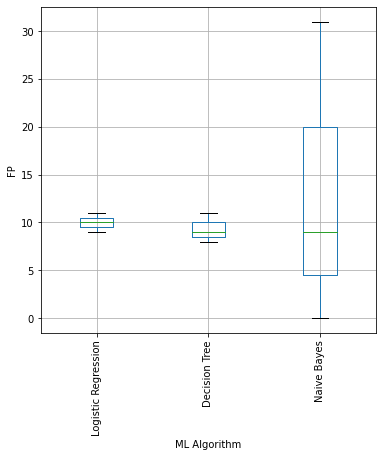

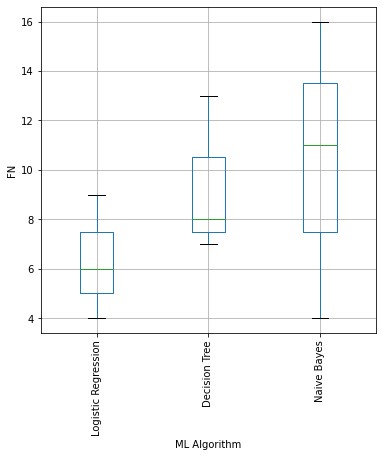

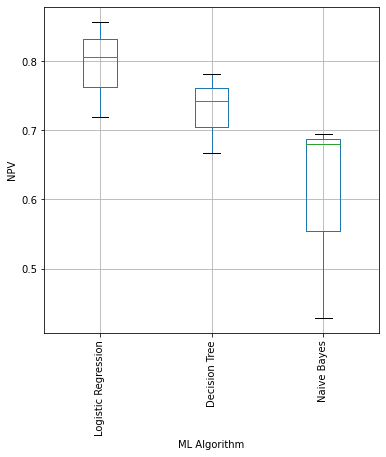

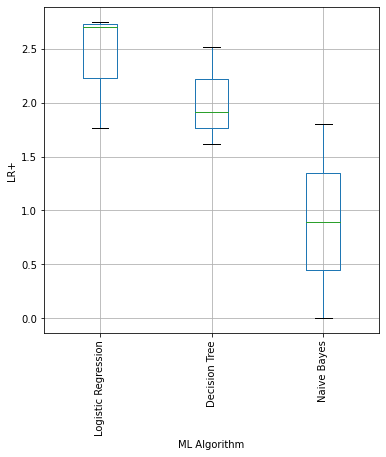

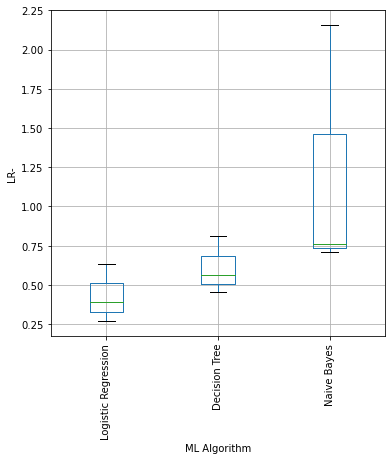

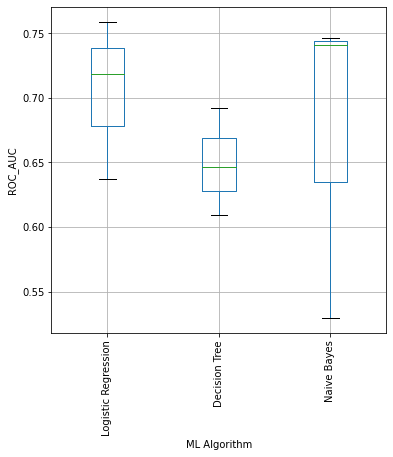

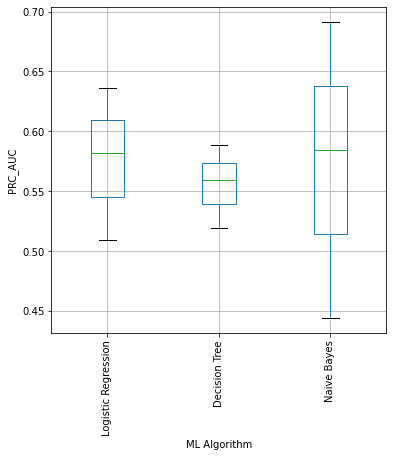

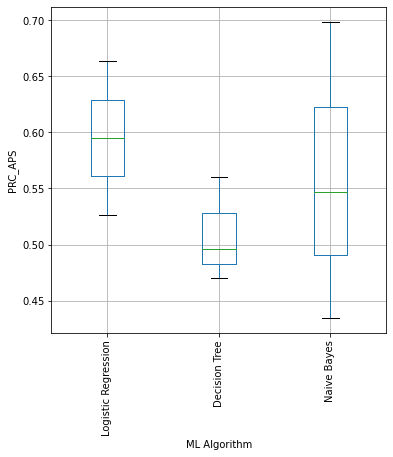

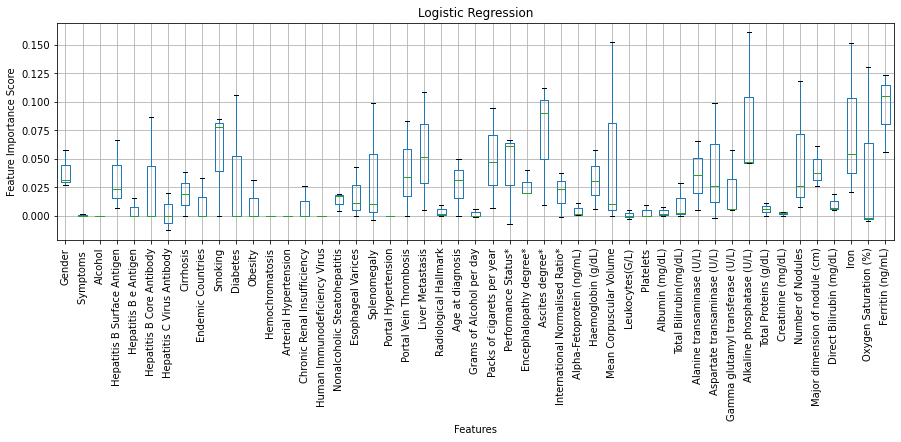

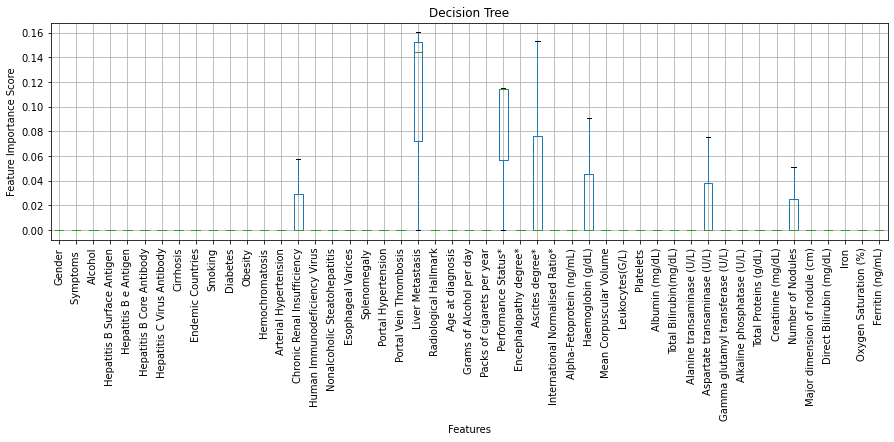

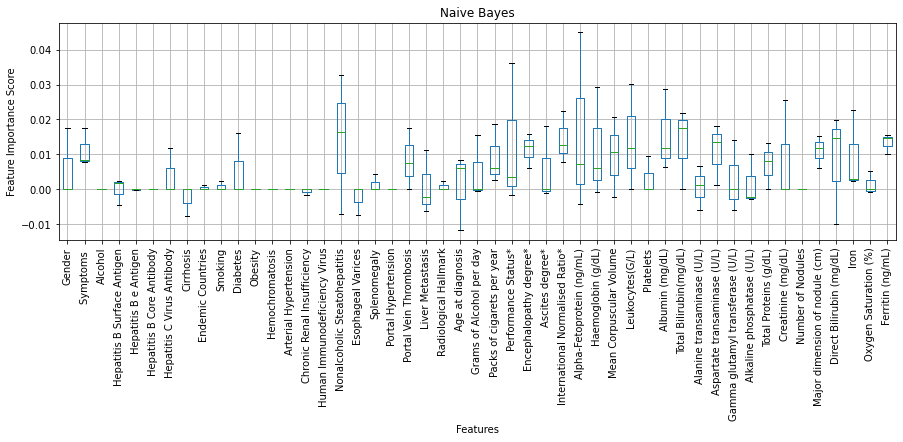

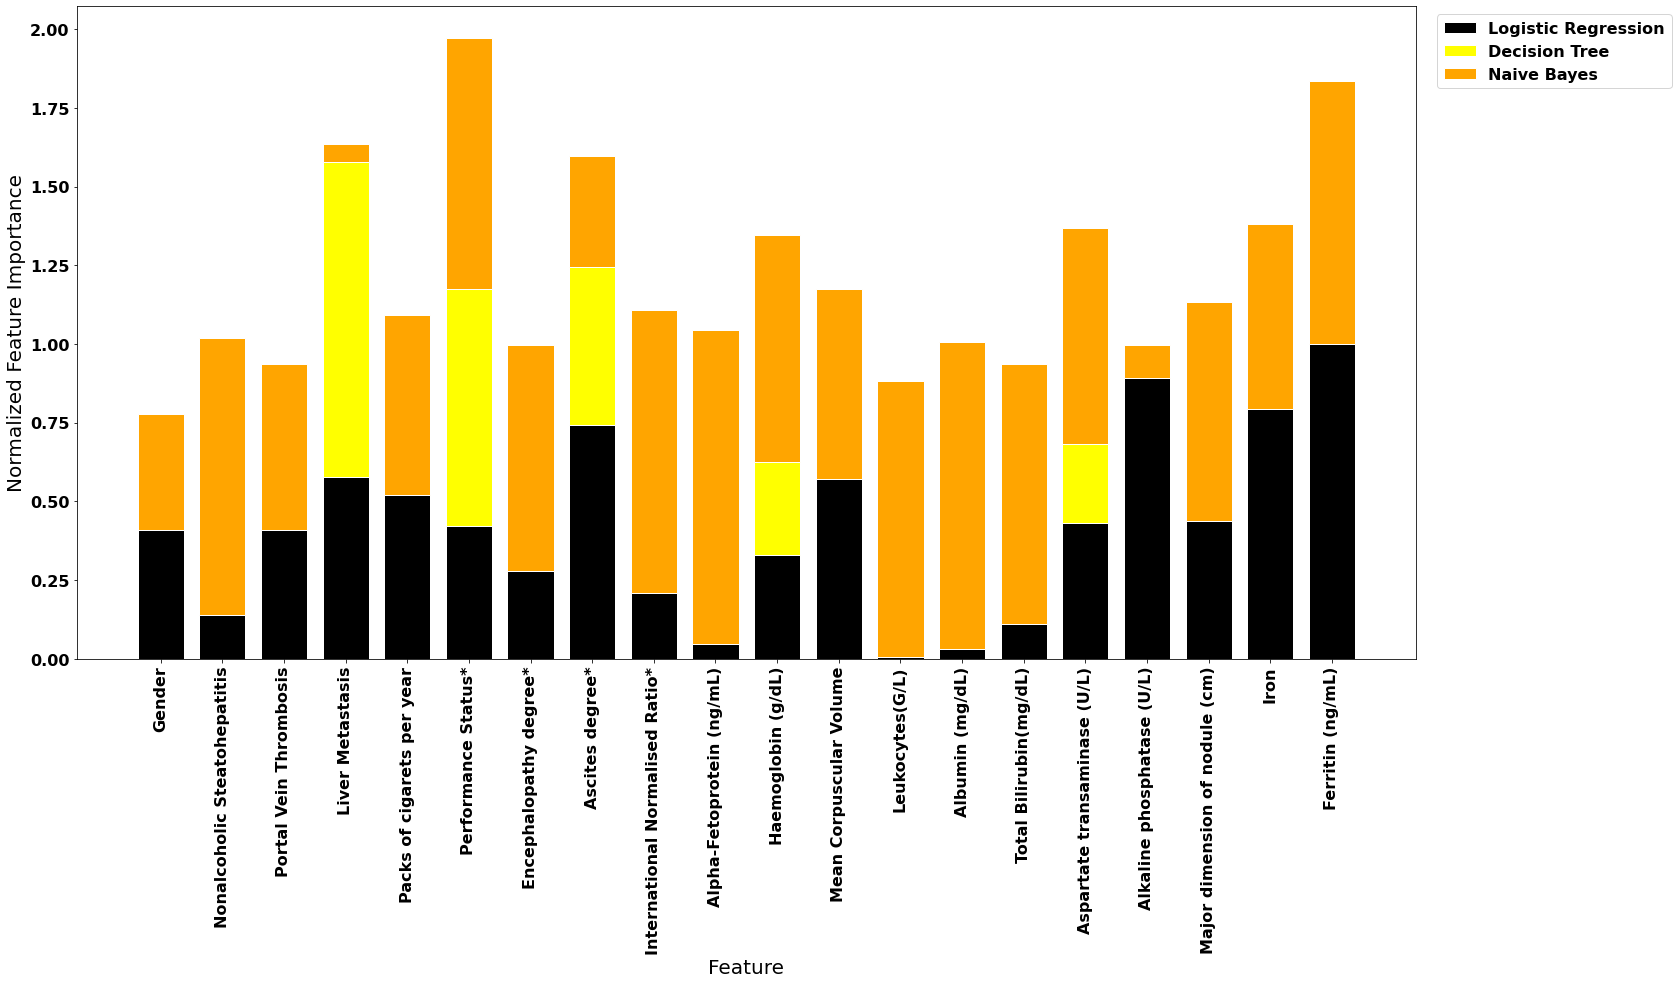

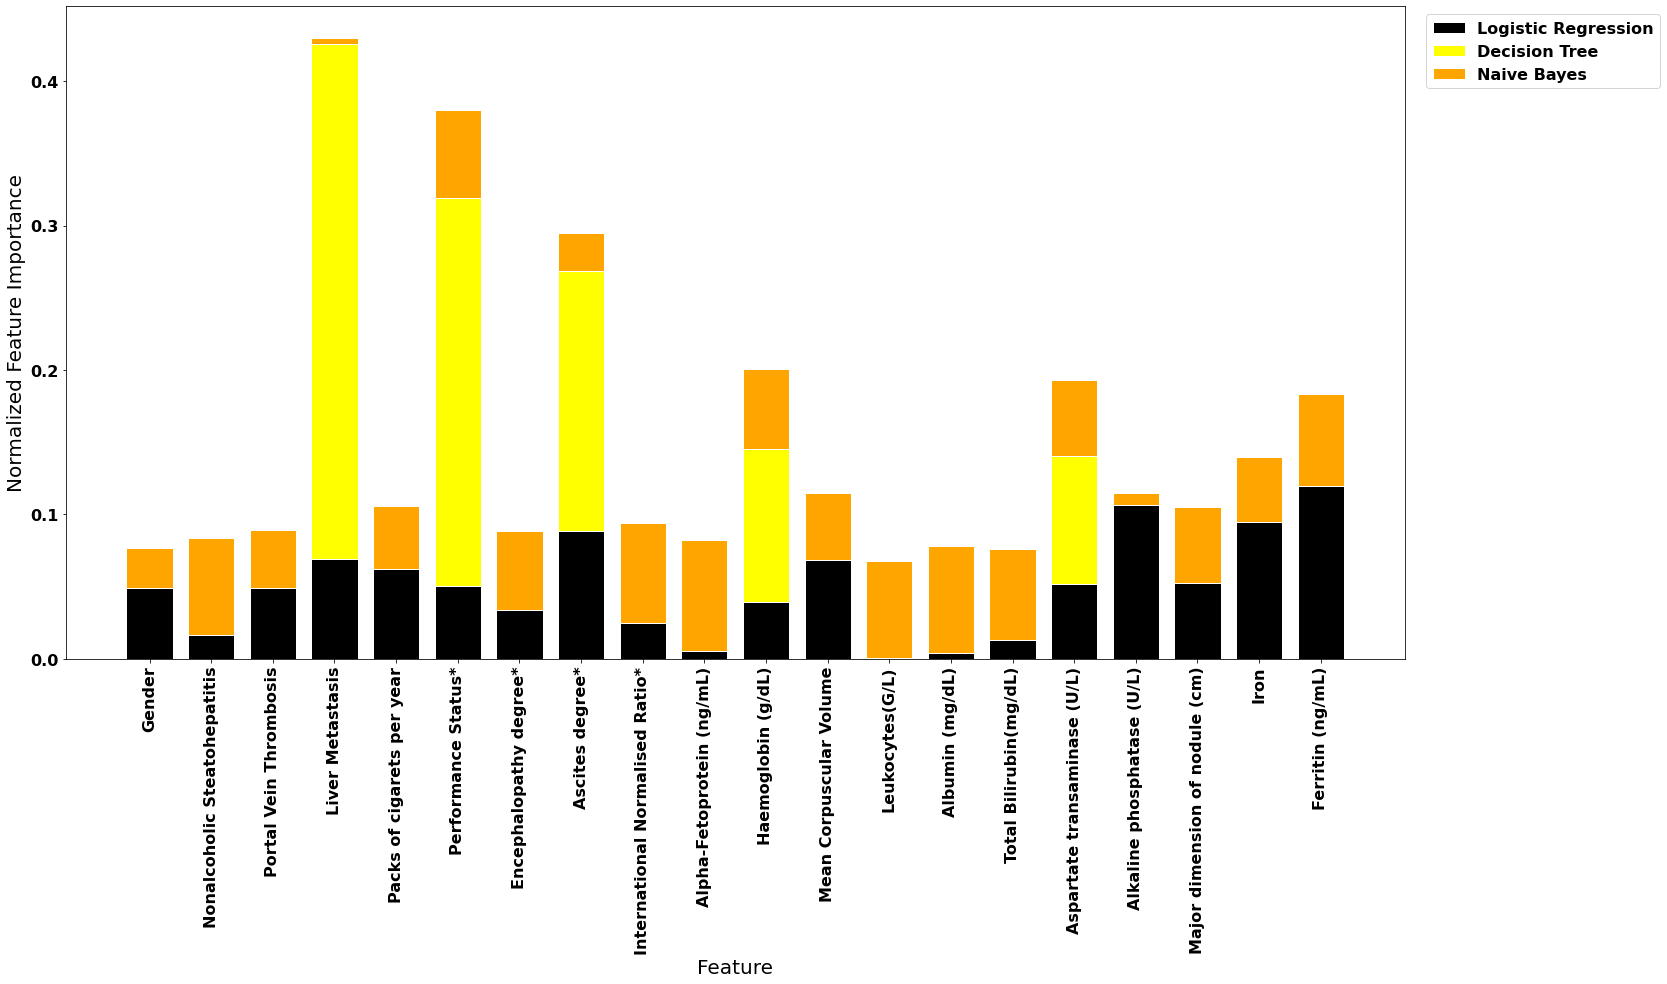

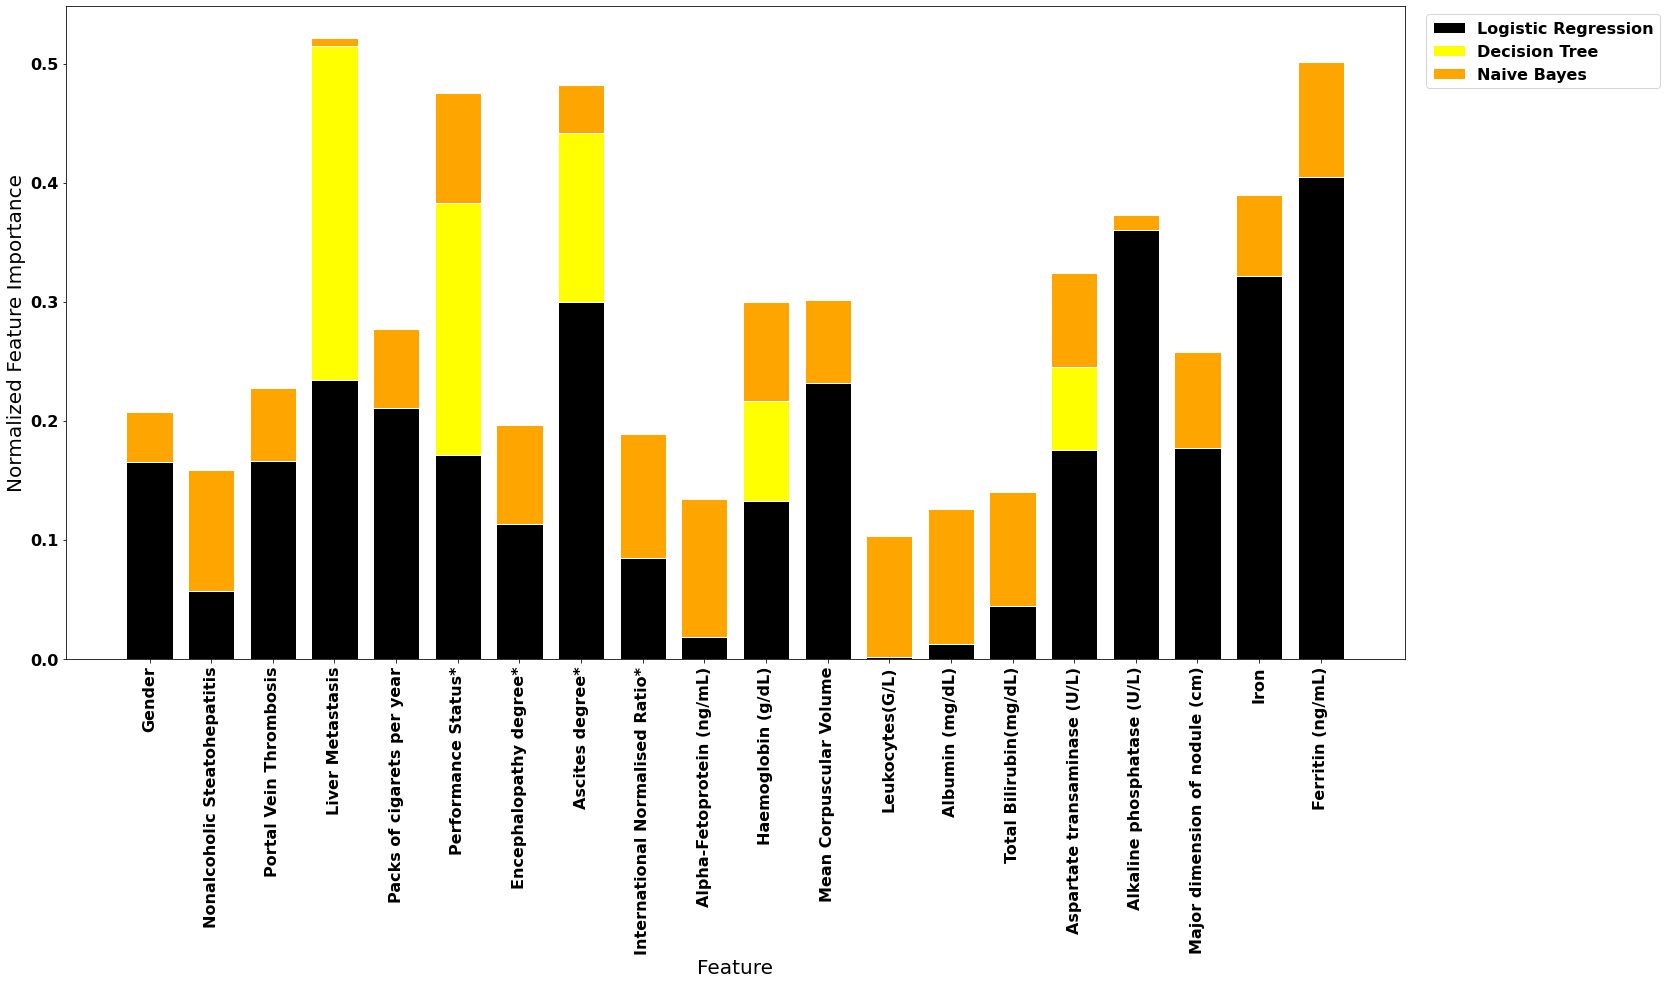

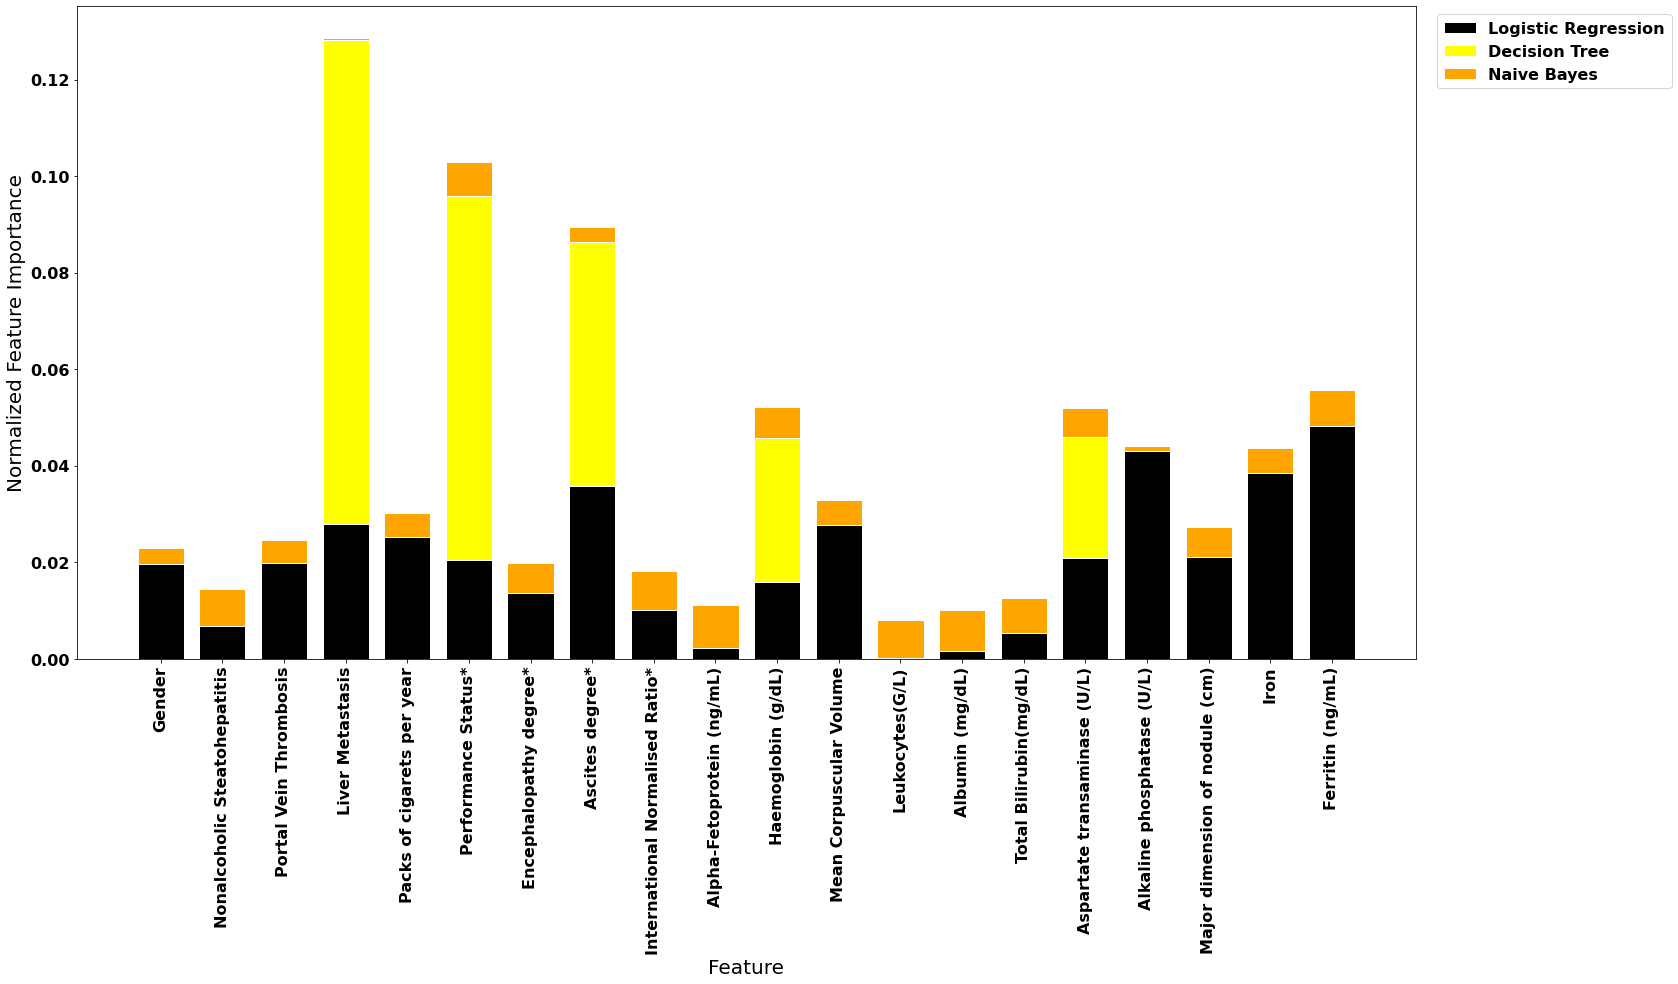

C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example_no_covariates


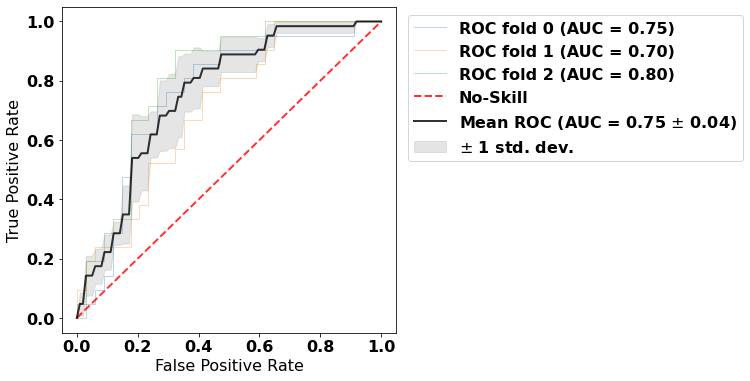

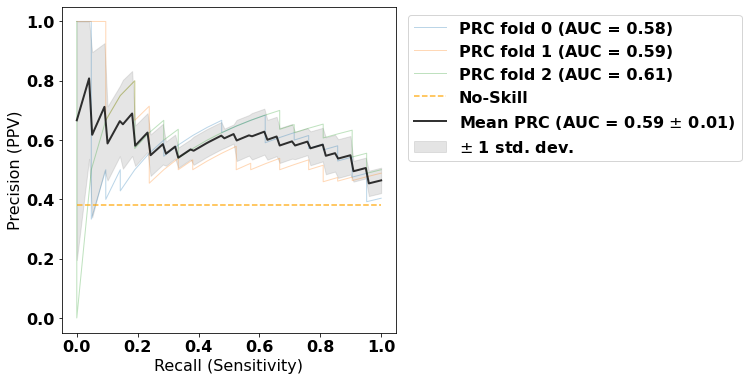

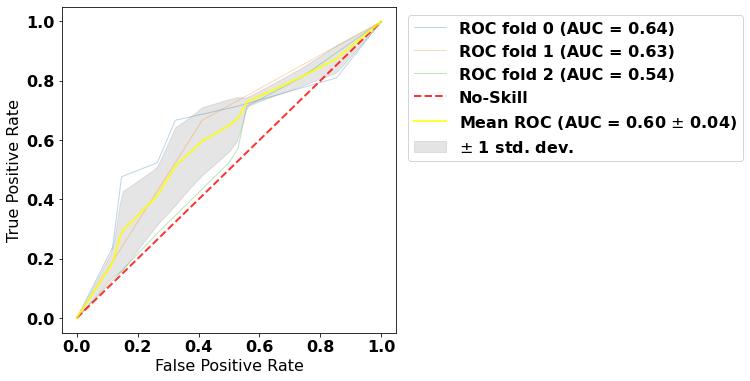

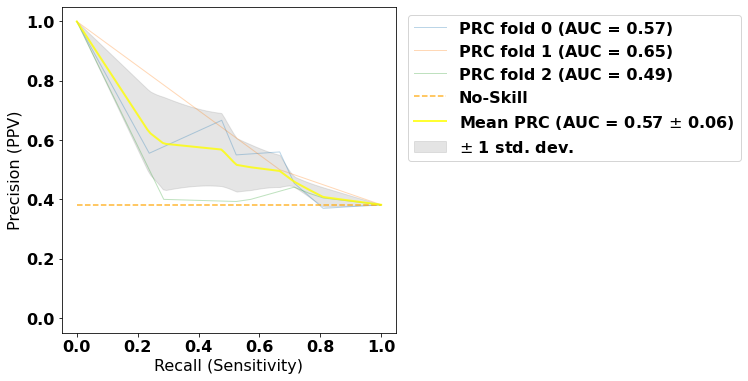

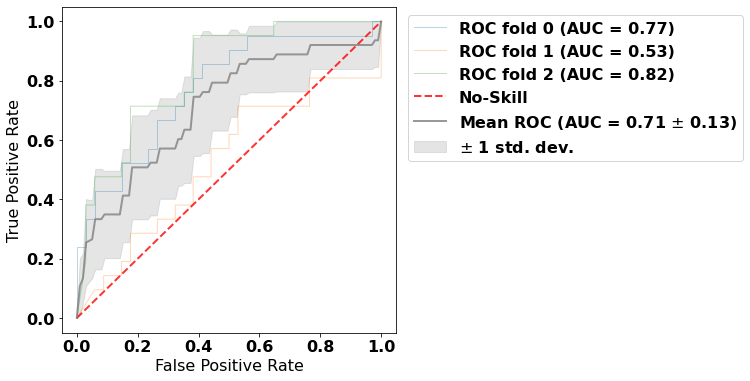

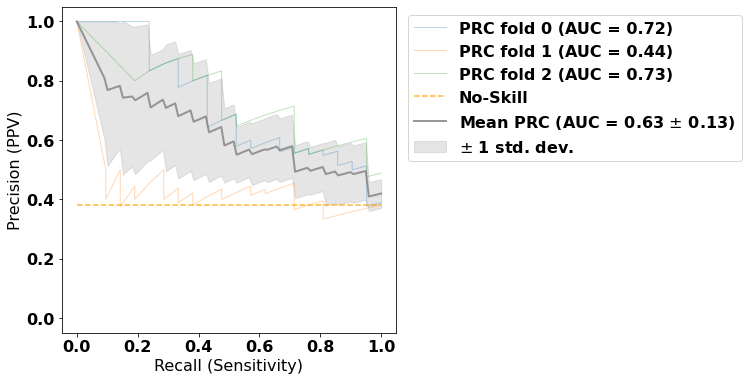

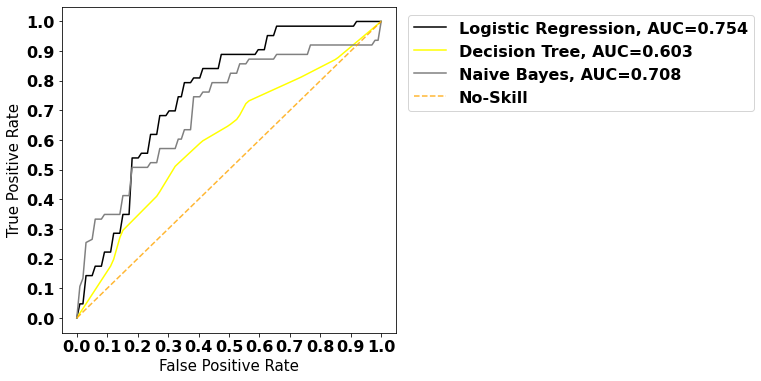

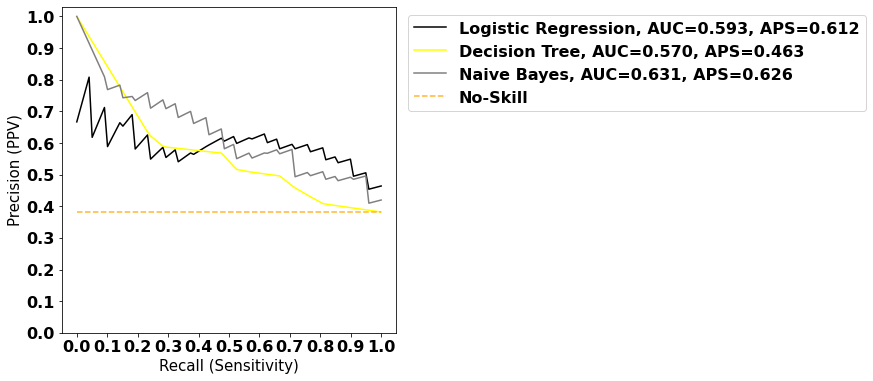

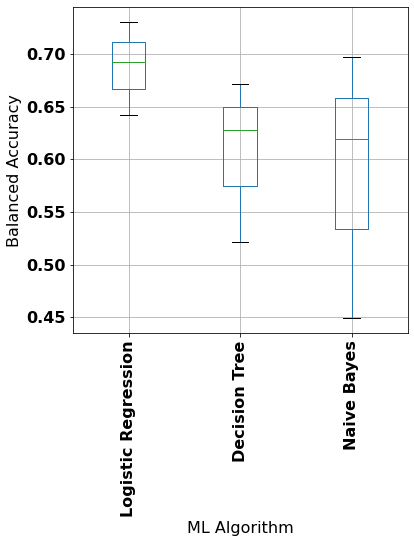

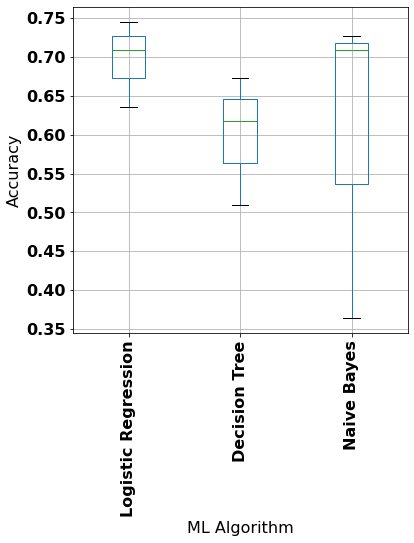

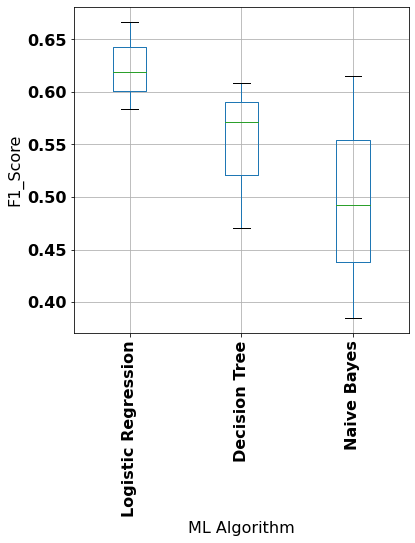

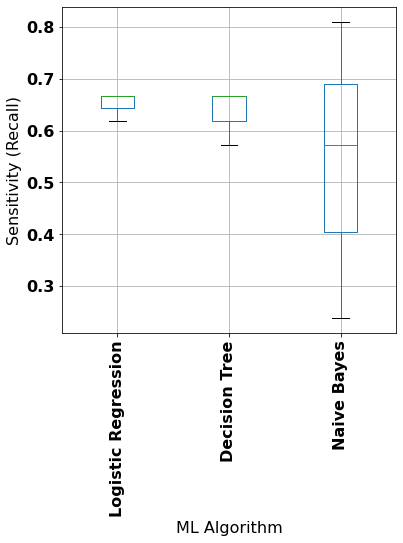

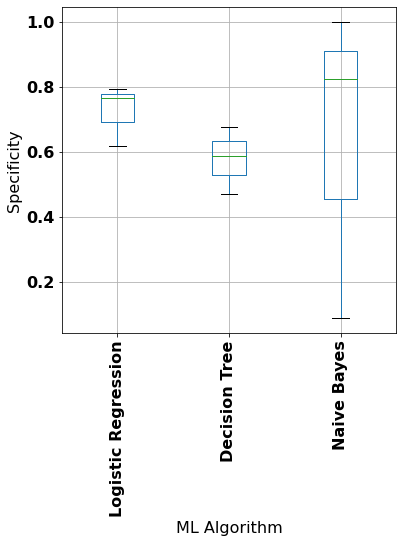

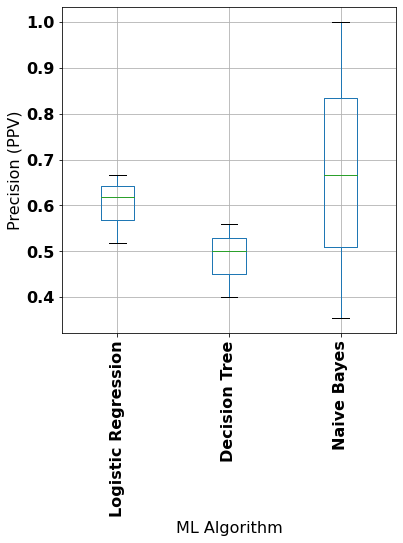

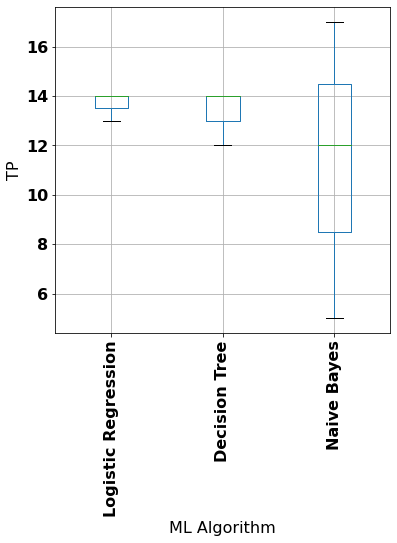

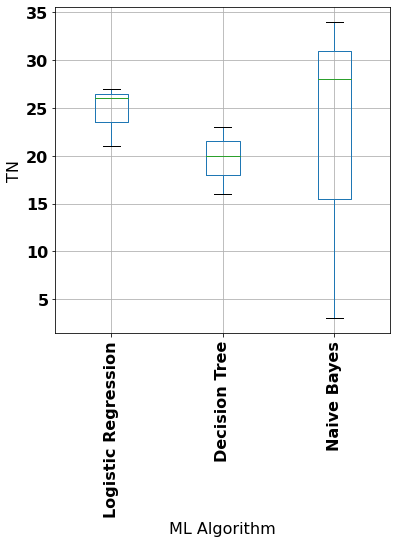

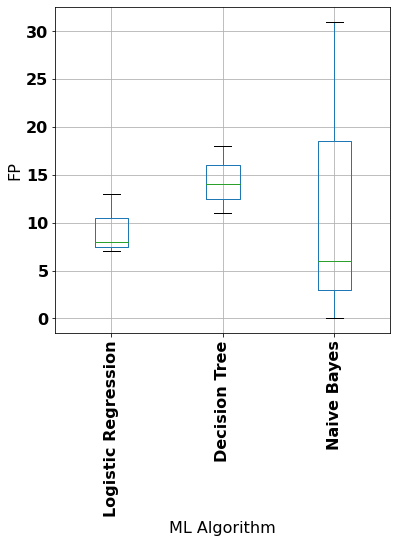

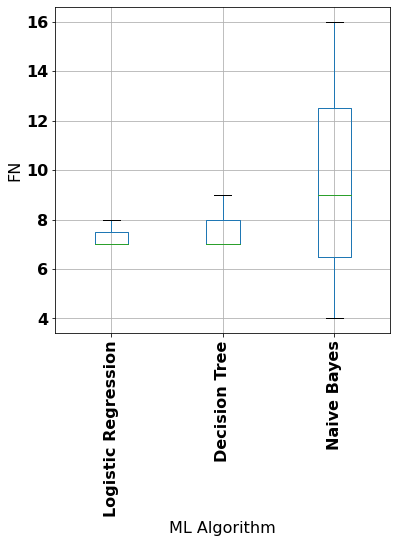

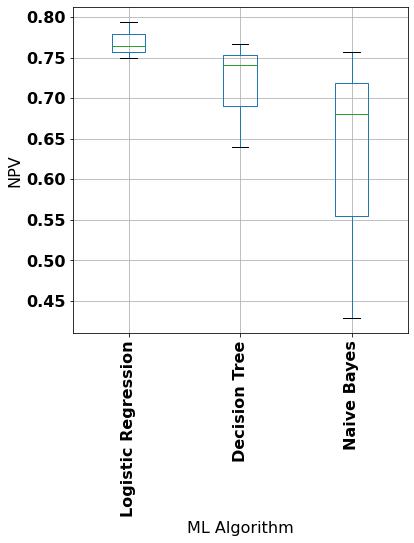

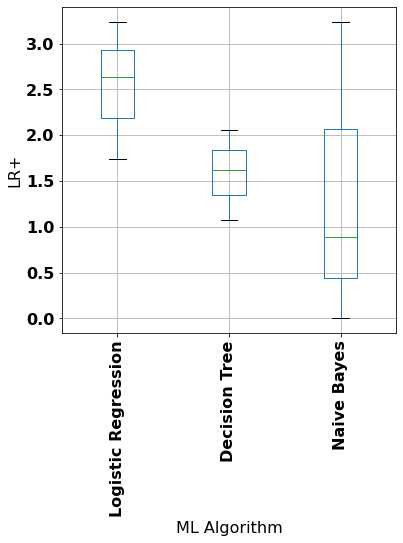

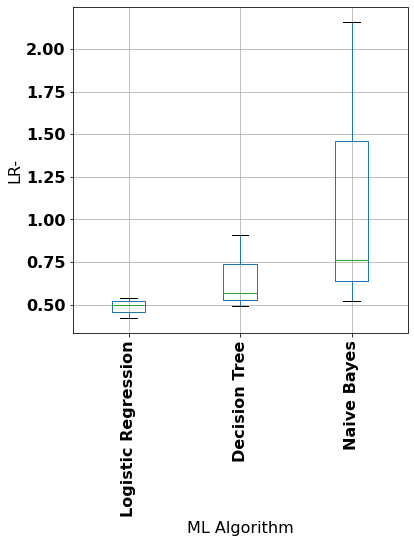

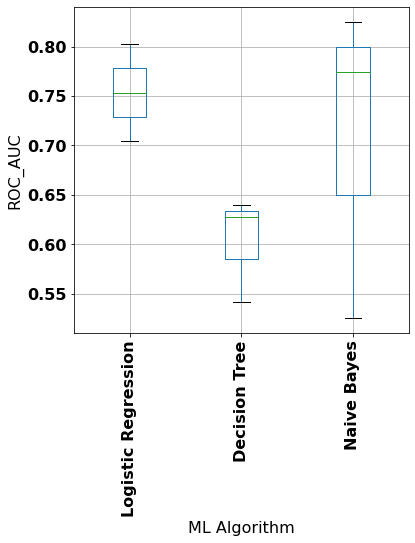

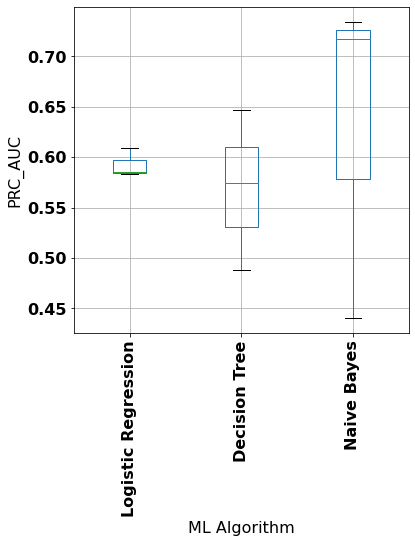

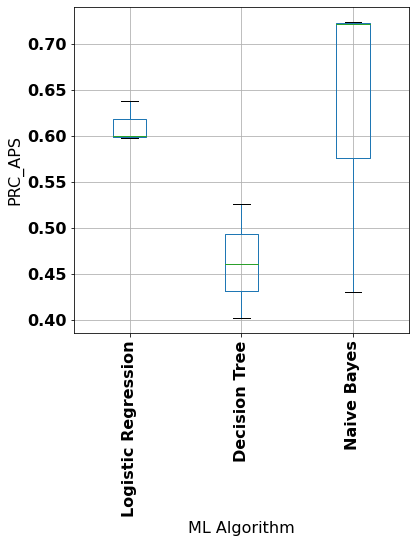

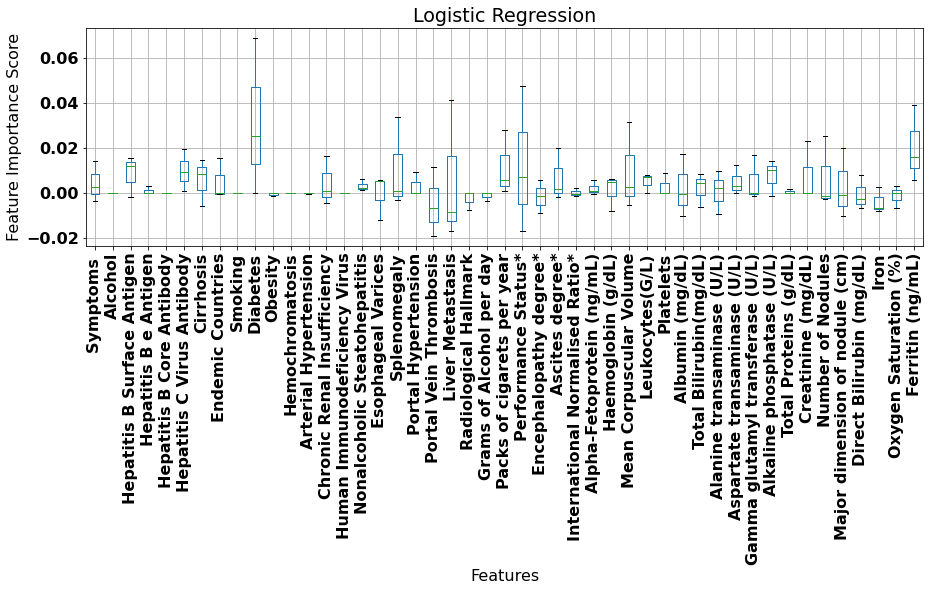

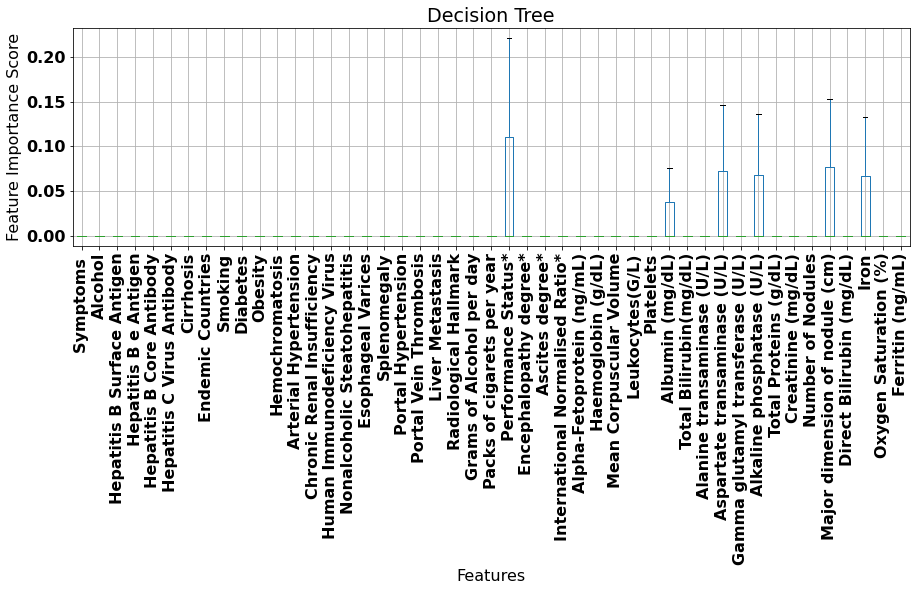

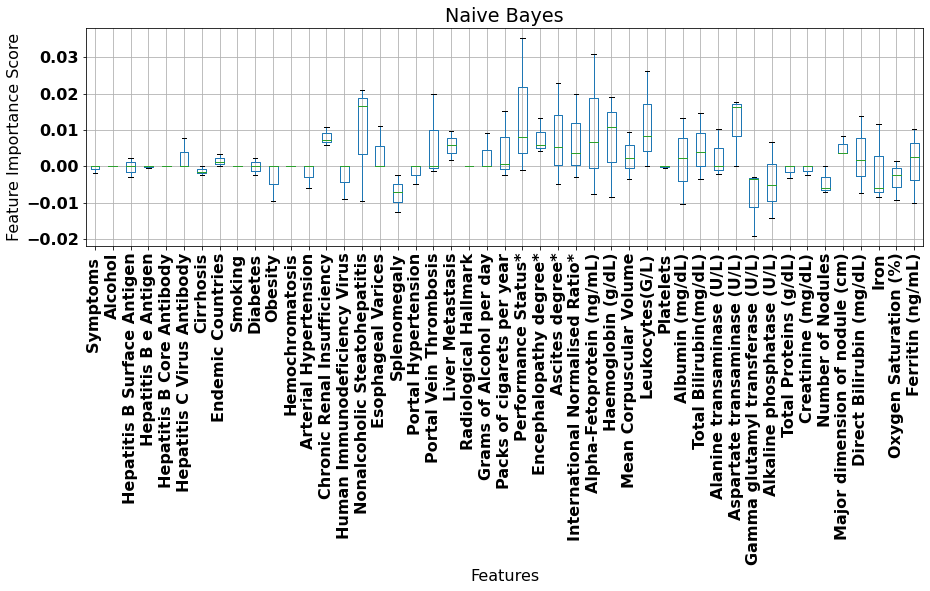

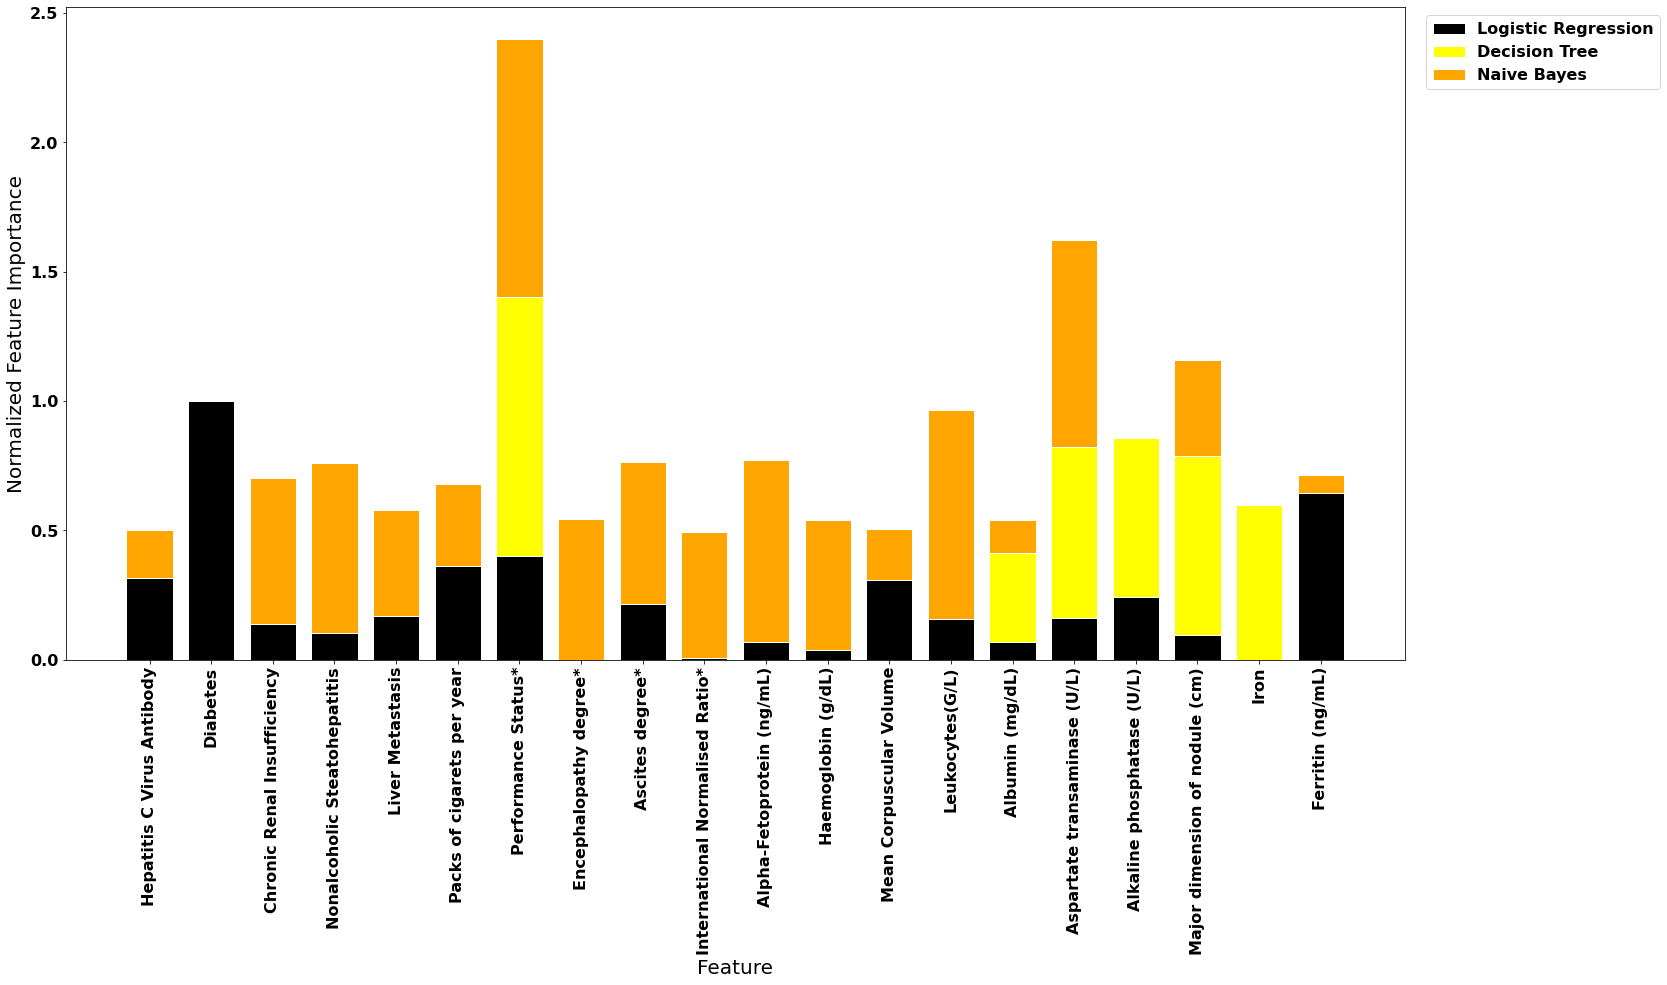

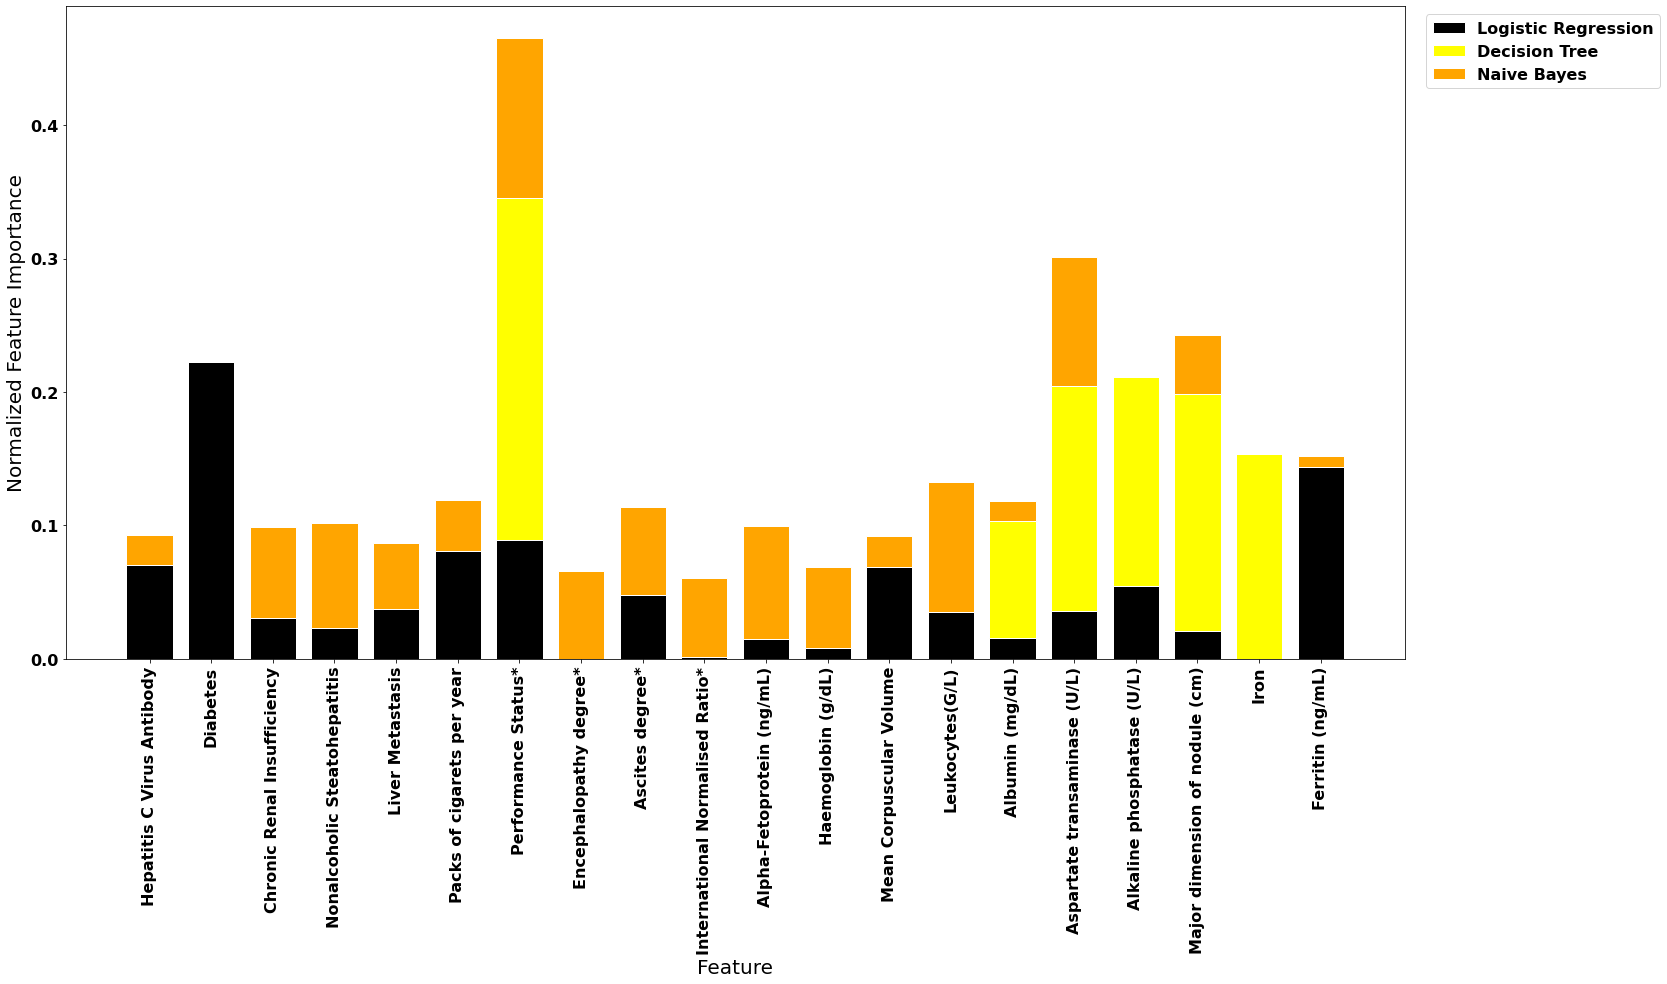

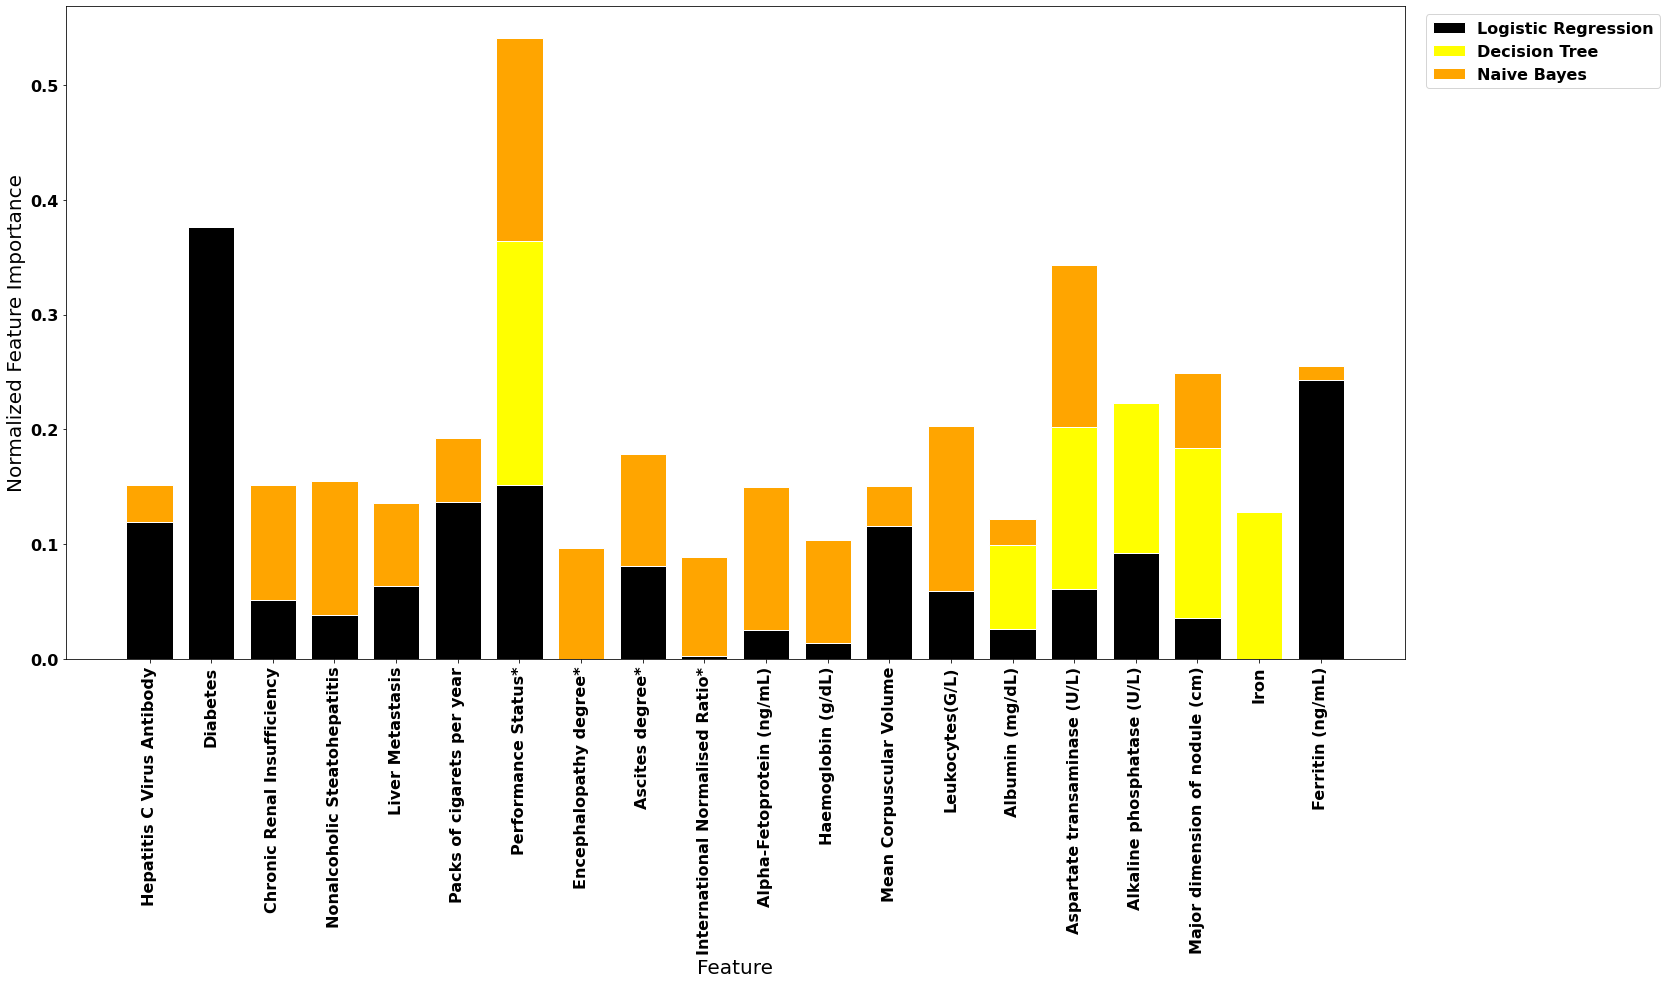

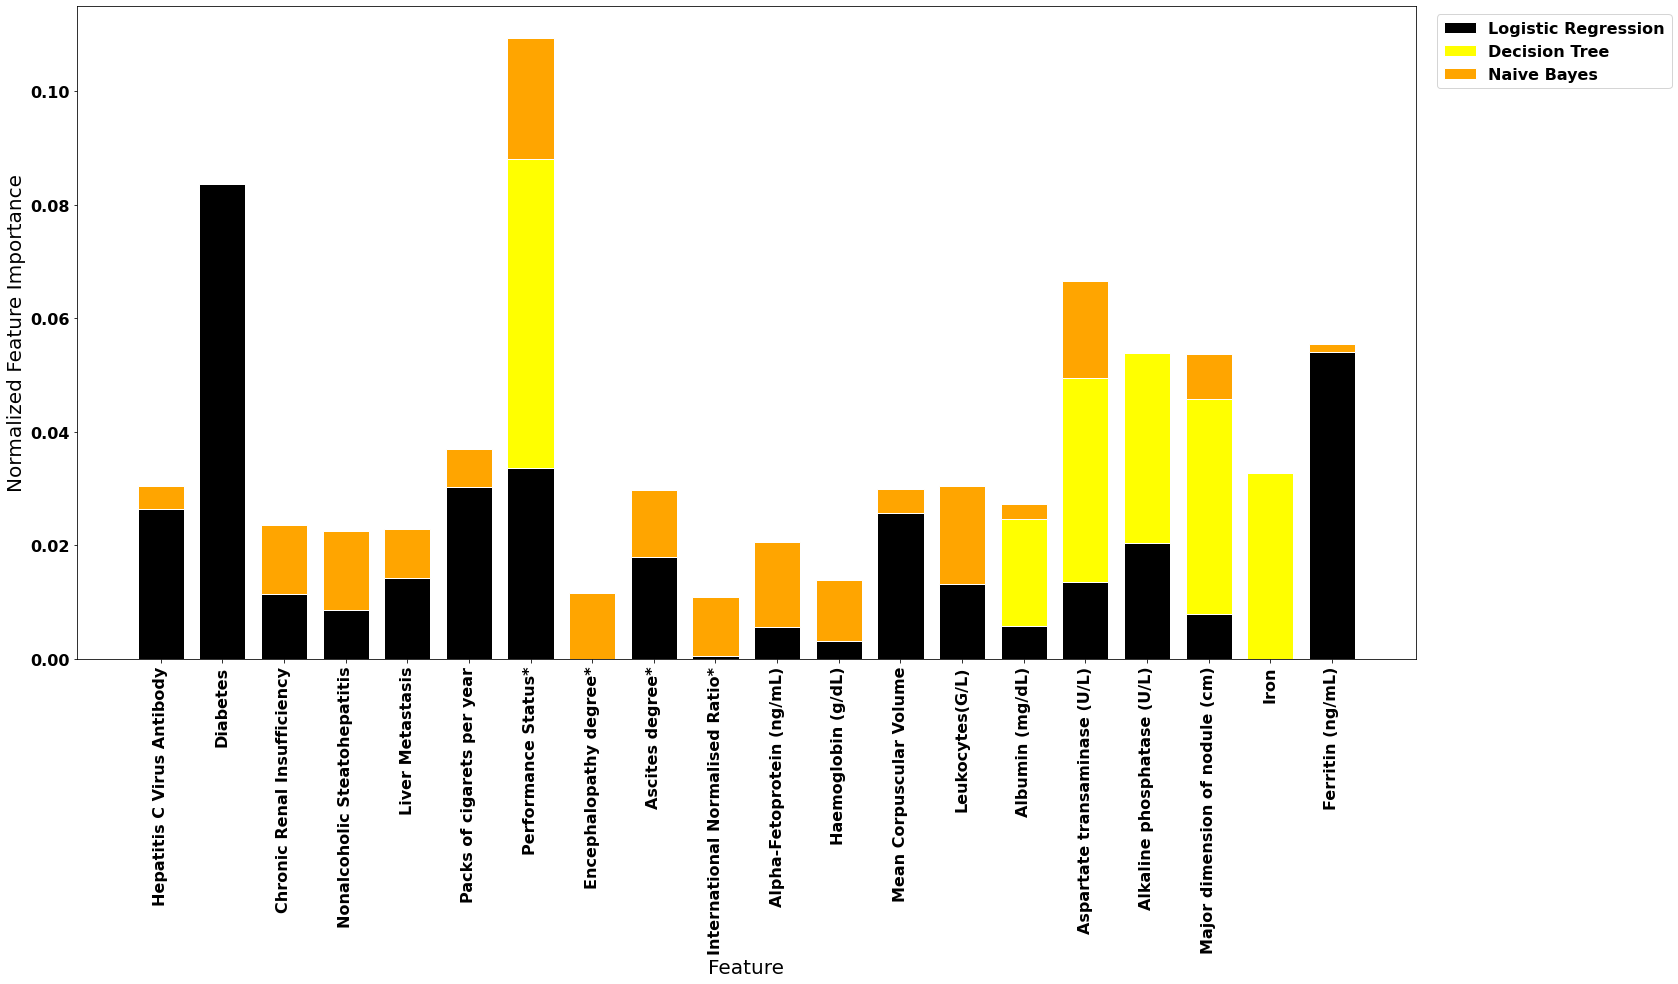

In [31]:
encodedAlgos = ''
encodedAlgos = encode(do_LR,encodedAlgos)
encodedAlgos = encode(do_DT, encodedAlgos)
encodedAlgos = encode(do_RF, encodedAlgos)
encodedAlgos = encode(do_NB, encodedAlgos)
encodedAlgos = encode(do_XGB, encodedAlgos)
encodedAlgos = encode(do_LGB, encodedAlgos)
encodedAlgos = encode(do_ANN, encodedAlgos)
encodedAlgos = encode(do_SVM, encodedAlgos)
encodedAlgos = encode(do_ExSTraCS, encodedAlgos)
encodedAlgos = encode(do_eLCS, encodedAlgos)
encodedAlgos = encode(do_XCS, encodedAlgos)
encodedAlgos = encode(do_GB, encodedAlgos)
encodedAlgos = encode(do_KN, encodedAlgos)

# Iterate through datasets
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    Stats(full_path,encodedAlgos,plot_ROC,plot_PRC,plot_FI_box,class_label,instance_label,cv_partitions,primary_metric)

## Phase 7 Dataset Comparison (only if > 1 dataset was analyzed)

### Phase 7 Import Additional Python Packages

In [32]:
import WrapperComparisonJob

### Phase 7 Set Run Parameters

In [33]:
#None

### Phase 7 Conduct Dataset Comparison

In [34]:
def DataCompare(experiment_path,sig_cutoff):
    # Get dataset paths
    datasets = os.listdir(experiment_path)
    datasets.remove('metadata.csv')
    
    dataset_directory_paths = []
    for dataset in datasets:
        full_path = experiment_path + "/" + dataset
        dataset_directory_paths.append(full_path)

    # Get algorithms
    algorithms = []
    name_to_abbrev = {'logistic_regression': 'LR', 'decision_tree': 'DT', 'random_forest': 'RF', 'naive_bayes': 'NB',
                      'XGB': 'XGB', 'LGB': 'LGB', 'ANN': 'ANN', 'SVM': 'SVM', 'ExSTraCS': 'ExSTraCS', 'eLCS': 'eLCS',
                      'XCS': 'XCS','gradient_boosting':'GB','k_neighbors':'KN'}
    abbrev_to_name = dict([(value, key) for key, value in name_to_abbrev.items()])
    for filepath in glob.glob(dataset_directory_paths[0] + '/training/pickledModels/*'):
        filepath = str(filepath).replace('\\','/')
        algo_name = abbrev_to_name[filepath.split('/')[-1].split('_')[0]]
        if not algo_name in algorithms:
            algorithms.append(algo_name)

    # Get Metrics
    data = pd.read_csv(dataset_directory_paths[0] + '/training/results/Summary_performance_mean.csv', sep=',')
    metrics = data.columns.values.tolist()[1:]

    # Create new directory
    if not os.path.exists(experiment_path+'/DatasetComparisons'):
        os.mkdir(experiment_path+'/DatasetComparisons')

    WrapperComparisonJob.kruscallWallis(experiment_path,datasets,algorithms,metrics,dataset_directory_paths,name_to_abbrev,sig_cutoff)

    WrapperComparisonJob.mannWhitneyU(experiment_path,datasets,algorithms,metrics,dataset_directory_paths,name_to_abbrev,sig_cutoff)
    
    global_data = WrapperComparisonJob.bestKruscallWallis(experiment_path,datasets,algorithms,metrics,dataset_directory_paths,name_to_abbrev,sig_cutoff)

    WrapperComparisonJob.bestMannWhitneyU(experiment_path,datasets,algorithms,metrics,dataset_directory_paths,name_to_abbrev,sig_cutoff,global_data)


In [35]:
if len(dataset_paths) > 1:
    DataCompare(output_path+'/'+experiment_name,sig_cutoff)

## PDF Report Generator

In [36]:
import pandas as pd
from fpdf import FPDF
from datetime import datetime
import os
import re
import sys
import argparse

In [37]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

#Create Footer
def footer(self):
    self.set_auto_page_break(auto=False, margin=3)
    self.set_y(285)
    self.set_font('Times', 'I', 7)
    self.cell(0, 7,'Generated with the URBS-Lab AutoMLPipe-BC: (https://github.com/UrbsLab/AutoMLPipe-BC)', 0, 0, 'C')
    self.set_font(family='times', size=9)

#Find N greatest ingegers within a list
def ngi(list1, N):
    final_list = []
    for i in range(0, N):
        max1 = 0
        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j];
        list1.remove(max1);
        final_list.append(max1)

In [38]:
experiment_path = output_path+'/'+experiment_name
print(experiment_path)

time = str(datetime.now())
print(time)
#Function to Convert Dataset lists into Usable Strings to Write to the PDF

#Find folders inside directory
ds = os.listdir(experiment_path)
nonds = ['DatasetComparisons', 'jobs', 'jobsCompleted', 'logs','metadata.csv',experiment_name+'_ML_Pipeline_Report.pdf']
for i in nonds:
    if i in ds:
        ds.remove(i)
if '.idea' in ds:
    ds.remove('.idea')
ds = sorted(ds)

ars_df = pd.read_csv(experiment_path+ '/'+'metadata.csv')
ars_dic = []
for i in range(len(ars_df)):
   if i >= 0:
      ars_dic.append(ars_df.iloc[i, 0]+': ')
      ars_dic.append(ars_df.iloc[i, 1])
      ars_dic.append('\n')
   else:
      pass
    
#Analysis Settings, Global Analysis Settings, ML Modeling Algorithms
analy_report = FPDF('P', 'mm', 'A4')
analy_report.set_margins(left=10, top=5, right=10, )
analy_report.add_page(orientation='P')
top = analy_report.y

#ML Pipeline Analysis Report-------------------------------------------------------------------------------------------------------
print("Starting Report")
ls1 = ars_dic[0:51]
ls2 = ars_dic[51:90]
ls3 = ars_dic[90:104]
ls4 = ars_dic[104:120]
analy_report.set_font('Times', 'B', 12)
analy_report.cell(w=180, h=8, txt='AutoMLPipe-BC Summary Report: '+time, ln=2, border=1, align='L')
analy_report.y += 3
analy_report.set_font(family='times', size=9)
analy_report.multi_cell(w = 90,h = 4,txt='Pipeline Settings:'+'\n'+'\n'+listToString(ls1)+' '+listToString(ls3), border=1, align='L')
analy_report.x += 90
analy_report.y = analy_report.y - 96
analy_report.multi_cell(w = 90,h = 4,txt='ML Modeling Algorithms:'+'\n'+'\n'+listToString(ls2), border=1, align='L')
analy_report.x += 90
analy_report.y += 2
analy_report.multi_cell(w = 90,h = 4,txt='LCS Settings:'+'\n'+listToString(ls4), border=1, align='L')
analy_report.y +=10

listDatasets = ''
i = 1
for each in ds:
    listDatasets = listDatasets+('D'+str(i)+' = '+str(each)+'\n')
    i += 1
analy_report.multi_cell(w = 180, h = 4, txt='Datasets: '+'\n'+listDatasets, border=1, align='L')
#analy_report.multi_cell(w = 180, h = 6, txt='Datasets: '+'\n'+ds[0]+'\n'+ds[1], border=1, align='L')
footer(analy_report)

#Exploratory Univariate Analysis for each Dataset------------------------------------------------------------------
print("Publishing Univariate Analysis")
analy_report.add_page(orientation='P')
analy_report.set_font('Times', 'B', 12)
analy_report.cell(w=180, h = 8, txt='Univariate Analysis of Each Dataset (Top 10 Features)', border=1, align='L', ln=2)
analy_report.set_font(family='times', size=9)
for n in range(len(ds)):
    analy_report.y += 1
    sig_df = pd.read_csv(experiment_path+'/'+ds[n]+'/exploratory/univariate/Significance.csv')
    sig_ls = []
    sig_df = sig_df.nsmallest(10, ['p-value'])
    for i in range(len(sig_df)):
        sig_ls.append(sig_df.iloc[i,0]+': ')
        sig_ls.append(str(sig_df.iloc[i,1]))
        sig_ls.append('\n')
    analy_report.multi_cell(w=180, h=4, txt='Exploratory Univariate Analysis: '+'D'+str(n+1)+' = '+ds[n]+'\n'+'Feature:  P-Value'+'\n'+listToString(sig_ls), border=1, align='L')
    analy_report.y += 1
footer(analy_report)

#Data and Model Prediction Summary--------------------------------------------------------------------------------------
print("Publishing Model Prediction Summary")
for n in range(len(ds)):
    #Create PDF and Set Options
    analy_report.set_margins(left=1, top=1, right=1, )
    analy_report.add_page()
    analy_report.set_font('Times', 'B', 12)
    analy_report.cell(w=0, h = 8, txt="Dataset and Model Prediction Summary:  D"+str(n+1)+" = "+ds[n], border=1, align="L", ln=2)
    analy_report.set_font(family='times', size=9)
    
    #Exploratory Analysis ----------------------------
    analy_report.image(experiment_path+'/'+ds[n]+'/exploratory/ClassCounts.png', 5, 12, 70) #10, 30, 82)
        
    analy_report.x = 125
    analy_report.y = 55
    try:
        analy_report.image(experiment_path+'/'+ds[n]+'/exploratory/FeatureCorrelations.png', 85, 12, 115) #88, 30, 120, 60)
    except:
        analy_report.cell(40, 4, 'No Feature Correlation Plot', 1, align="L")
        pass
    
    data_summary = pd.read_csv(experiment_path+'/'+ds[n]+"/exploratory/DataCounts.csv")
    info_ls = []
    for i in range(len(data_summary)):
        info_ls.append(data_summary.iloc[i,0]+': ')
        info_ls.append(str(data_summary.iloc[i,1]))
        info_ls.append('\n')
    
    analy_report.x = 23
    analy_report.y = 62
    analy_report.multi_cell(w=40, h=4, txt='Variable:  Count'+'\n'+listToString(info_ls), border=1, align='L')
    
    #Report Best Algorithms by metric
    summary_performance = pd.read_csv(experiment_path+'/'+ds[n]+"/training/results/Summary_performance_mean.csv")
    summary_performance['ROC_AUC'] = summary_performance['ROC_AUC'].astype(float)
    highest_ROC = summary_performance['ROC_AUC'].max()
    algorithm = summary_performance[summary_performance['ROC_AUC'] == highest_ROC].index.values
    best_alg_ROC =  summary_performance.iloc[algorithm, 0]
    
    summary_performance['Balanced Accuracy'] = summary_performance['Balanced Accuracy'].astype(float)
    highest_BA = summary_performance['Balanced Accuracy'].max()
    algorithm = summary_performance[summary_performance['Balanced Accuracy'] == highest_BA].index.values
    best_alg_BA =  summary_performance.iloc[algorithm, 0]

    summary_performance['F1_Score'] = summary_performance['F1_Score'].astype(float)
    highest_F1 = summary_performance['F1_Score'].max()
    algorithm = summary_performance[summary_performance['F1_Score'] == highest_F1].index.values
    best_alg_F1 =  summary_performance.iloc[algorithm, 0]
    
    summary_performance['PRC_AUC'] = summary_performance['PRC_AUC'].astype(float)
    highest_PRC = summary_performance['PRC_AUC'].max()
    algorithm = summary_performance[summary_performance['PRC_AUC'] == highest_PRC].index.values
    best_alg_PRC = summary_performance.iloc[algorithm, 0]

    summary_performance['PRC_APS'] = summary_performance['PRC_APS'].astype(float)
    highest_APS = summary_performance['PRC_APS'].max()
    algorithm = summary_performance[summary_performance['PRC_APS'] == highest_APS].index.values
    best_alg_APS = summary_performance.iloc[algorithm, 0]

    analy_report.x = 5
    analy_report.y = 87
    analy_report.multi_cell(w=70, h=4, txt="Best (ROC_AUC): "+ str(best_alg_ROC.values)+' = '+ str("{:.3f}".format(highest_ROC))+
                '\n'+"Best (Balanced Acc.): "+ str(best_alg_BA.values)+' = '+ str("{:.3f}".format(highest_BA))+
                '\n'+"Best (F1 Score): "+ str(best_alg_F1.values)+' = '+ str("{:.3f}".format(highest_F1))+
                '\n'+"Best (PRC_AUC): "+ str(best_alg_PRC.values)+' = '+ str("{:.3f}".format(highest_PRC))+
                '\n'+"Best (PRC_APS): "+ str(best_alg_APS.values)+' = '+ str("{:.3f}".format(highest_APS)), border=1, align='L')
    
    #ROC-------------------------------
    analy_report.x = 5
    analy_report.y = 112
    analy_report.cell(10, 4, 'ROC', 1, align="L")
    analy_report.image(experiment_path+'/'+ds[n]+'/training/results/Summary_ROC.png', 4, 118, 120)
    analy_report.image(experiment_path+'/'+ds[n]+'/training/results/performanceBoxplots/Compare_ROC_AUC.png', 124, 118, 82)
    
    #PRC-------------------------------
    analy_report.x = 5
    analy_report.y = 200
    analy_report.cell(10, 4, 'PRC', 1, align="L")
    analy_report.image(experiment_path+'/'+ds[n]+'/training/results/Summary_PRC.png', 4, 206, 133) #wider to account for more text
    analy_report.image(experiment_path+'/'+ds[n]+'/training/results/performanceBoxplots/Compare_PRC_AUC.png', 138, 205, 68)

    footer(analy_report)
    
#ML Dataset Feature Importance Summary----------------------------------------------------------------
for k in range(len(ds)):
    analy_report.add_page()
    analy_report.set_font('Times', 'B', 12)
    analy_report.cell(w=0, h = 8, txt="ML Feature Importance Summary:  D"+str(k+1) +' = '+ ds[k], border=1, align="L", ln=2)
    analy_report.set_font(family='times', size=9)

    analy_report.image(experiment_path+'/'+ds[k]+'/mutualinformation/TopAverageScores.png', 5, 12, 100)
    analy_report.image(experiment_path+'/'+ds[k]+'/multisurf/TopAverageScores.png', 105, 12, 100)
    
    analy_report.x = 0
    analy_report.y = 150
    analy_report.cell(0, 8, "Compound Feature Importance Plot", 1, align="L")
        #Images

    analy_report.image(experiment_path+'/'+ds[k]+'/training/results/FI/Compare_FI_Norm_Frac_Weight.png', 5, 159, 200)
    footer(analy_report)

#Create Best Kruskall Wallis Dataset Comparison Page---------------------------------------
print("Publishing Statistical Analysis")

analy_report.add_page(orientation='P')
analy_report.set_margins(left=1, top=10, right=1, )
    
d = []
for i in range(len(ds)):
    d.append('Data '+str(i+1)+'= '+ ds[i])
    d.append('\n')

analy_report.set_font('Times', 'B', 12)
analy_report.cell(w=0, h = 8, txt='Using Best Performing Algorithms (Kruskall Wallis Compare Datasets)', border=1, align="L", ln=2)
analy_report.set_font(family='times', size=7)

#Key
listDatasets = ''
i = 1
for each in ds:
    listDatasets = listDatasets+('D'+str(i)+' = '+str(each)+'\n')
    i += 1

analy_report.x = 5
analy_report.y = 14
analy_report.multi_cell(w = 180, h = 4, txt='Datasets: '+'\n'+listDatasets, border=1, align='L')
analy_report.y += 5

#Kruskall Wallis Table
#A table can take at most 4 datasets to fit comfortably with these settings
try:
    kw_ds = pd.read_csv(experiment_path+'/DatasetComparisons/'+'BestCompare_KruskalWallis.csv',sep=',',index_col=0)
    kw_ds = kw_ds.round(4)

    #Process
    for i in range(len(ds)):
        kw_ds = kw_ds.drop('Std_D'+str(i+1),1)
    kw_ds = kw_ds.drop('Statistic',1)
    kw_ds = kw_ds.drop('Sig(*)',1)

    #Format
    kw_ds.reset_index(inplace=True)
    kw_ds = kw_ds.columns.to_frame().T.append(kw_ds, ignore_index=True)
    kw_ds.columns = range(len(kw_ds.columns))
    epw = 208 #Amount of Space (width) Avaliable
    th = analy_report.font_size
    col_width = epw/float(10) #maximum column width


    dfLength = len(ds)
    print(dfLength)
    if len(ds) <= 4:
        kw_ds = kw_ds.to_numpy()
        for row in kw_ds:
            for datum in row:
                analy_report.cell(col_width, th, str(datum), border=1)
            analy_report.ln(th) #critical
    else:
        #Print next 3 datasets
        table1 = kw_ds.iloc[: , :10]
        table1 = table1.to_numpy()
        for row in table1:
            for datum in row:
                analy_report.cell(col_width, th, str(datum), border=1)
            analy_report.ln(th) #critical
        analy_report.y += 5

        table1 = kw_ds.iloc[: , 10:18]
        met = kw_ds.iloc[:,0]
        met2 = kw_ds.iloc[:,1]
        table1 = pd.concat([met,met2, table1], axis=1)
        table1 = table1.to_numpy()
        for row in table1:
            for datum in row:
                analy_report.cell(col_width, th, str(datum), border=1)
            analy_report.ln(th) #critical
        analy_report.y += 5

        if len(ds) > 8:
            table1 = kw_ds.iloc[: , 18:26]
            met = kw_ds.iloc[:,0]
            met2 = kw_ds.iloc[:,1]
            table1 = pd.concat([met,met2,table1], axis=1)
            table1 = table1.to_numpy()
            for row in table1:
                for datum in row:
                    analy_report.cell(col_width, th, str(datum), border=1)
                analy_report.ln(th) #critical
            analy_report.y += 5

        if len(ds) > 12:
            table1 = kw_ds.iloc[: , 26:34]
            met = kw_ds.iloc[:,0]
            met2 = kw_ds.iloc[:,1]
            table1 = pd.concat([met,met2,table1], axis=1)
            table1 = table1.to_numpy()
            for row in table1:
                for datum in row:
                    analy_report.cell(col_width, th, str(datum), border=1)
                analy_report.ln(th) #critical
            analy_report.y += 5

        if len(ds) > 16:
            analy_report.x = 0
            analy_report.y = 260
            analy_report.cell(0, 4, 'Warning: Additional dataset results could not be displayed', 1, align="C")

except:
    pass

footer(analy_report)

#Output The PDF Object
try:
    os.chdir(experiment_path)
    experiment_name = experiment_path.split('/')[-1].split('.')[-1]
    analy_report.output(name=experiment_name+'_ML_Pipeline_Report.pdf')
    print('PDF Generation Complete')
except:
    print('Pdf Output Failed')



C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test
2021-05-11 16:32:23.172612
Starting Report


[]

[]

[]

[]

Publishing Univariate Analysis


[]

[]

Publishing Model Prediction Summary


[]

[]

[]

[]

Publishing Statistical Analysis


[]

2


''

PDF Generation Complete
